In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
BICYCLE = 15
SCOOTER = 21
E_BICYCLE = 23

micro_m = [SCOOTER, E_BICYCLE, BICYCLE]

In [3]:
involved_markers_heb_ta = pd.read_csv('./csv_tables/involved_markers_heb_ta.csv')
involved_markers_heb_ta['accident_date'] = pd.to_datetime(involved_markers_heb_ta['accident_date'])
involved_markers_heb_ta


C:\Users\itay8\AppData\Local\Temp\ipykernel_3652\4074794966.py:1: DtypeWarning: Columns (44,151) have mixed types. Specify dtype option on import or set low_memory=False.
  involved_markers_heb_ta = pd.read_csv('./csv_tables/involved_markers_heb_ta.csv')


accident_id  provider_and_id  provider_code  file_type_police  \
0        2013001938      12013001938              1                 1   
1        2013001938      12013001938              1                 1   
2        2013002190      12013002190              1                 1   
3        2013002190      12013002190              1                 1   
4        2023065778      32023065778              3                 3   
...             ...              ...            ...               ...   
103058   2023093433      32023093433              3                 3   
103059   2023099292      32023099292              3                 3   
103060   2023092779      32023092779              3                 3   
103061   2023090298      32023090298              3                 3   
103062   2023091245      32023091245              3                 3   

        involved_type involved_type_hebrew  license_acquiring_date  age_group  \
0                   1                  נהג                    1996          8   
1                   3                 נפגע                       0          5   
2                   1                  נהג                       0         99   
3                   1                  נהג                       0         99   
4                   1                  נהג                       0         99   
...               ...                  ...                     ...        ...   
103058              2             נהג נפגע                       0         99   
103059              1                  נהג                    2001          9   
103060              1                  נהג                       0         99   
103061              2             נהג נפגע                    1995         10   
103062              2             נהג נפגע                    2010          7   

       age_group_hebrew  sex  ... vehicle_status  vehicle_status_hebrew  \
0                 35-39  1.0  ...            0.0                    NaN   
1                 20-24  1.0  ...            0.0                    NaN   
2               לא ידוע  0.0  ...            0.0                    NaN   
3               לא ידוע  0.0  ...            0.0                    NaN   
4               לא ידוע  0.0  ...            0.0                    NaN   
...                 ...  ...  ...            ...                    ...   
103058          לא ידוע  0.0  ...            0.0                    NaN   
103059            40-44  2.0  ...            0.0                    NaN   
103060          לא ידוע  0.0  ...            0.0                    NaN   
103061            45-49  2.0  ...            0.0                    NaN   
103062            30-34  2.0  ...            0.0                    NaN   

       vehicle_attribution  vehicle_attribution_hebrew seats  total_weight  \
0                      1.0                      ישראלי  99.0           1.0   
1                      1.0                      ישראלי  99.0           1.0   
2                      0.0                    לא מנועי  99.0           0.0   
3                      1.0                      ישראלי   3.0           1.0   
4                      1.0                      ישראלי   3.0           2.0   
...                    ...                         ...   ...           ...   
103058                 1.0                      ישראלי  99.0           0.0   
103059                 1.0                      ישראלי   3.0           1.0   
103060                 1.0                      ישראלי  99.0           0.0   
103061                 1.0                      ישראלי   3.0           1.0   
103062                 1.0                      ישראלי  99.0           0.0   

       total_weight_hebrew  vehicle_damage vehicle_damage_hebrew  \
0                   עד 1.9             1.0                    קל   
1                   עד 1.9             1.0                    קל   
2                  לא ידוע             4.0               אין נזק   
3                   עד 1.9             4.0      

In [4]:
involved_markers_heb_ta['accident_date']

0        2013-07-31 02:00:00
1        2013-07-31 02:00:00
2        2013-03-14 02:30:00
3        2013-03-14 02:30:00
4        2023-01-05 14:15:00
                 ...        
103058   2023-02-14 08:30:00
103059   2023-02-23 17:00:00
103060   2023-01-24 23:15:00
103061   2023-01-01 16:00:00
103062   2023-03-05 20:30:00
Name: accident_date, Length: 103063, dtype: datetime64[ns]

In [5]:
interesting_cols = ['injury_severity','injury_severity_hebrew',
                 'injured_type','injured_type_hebrew',
                 'accident_severity','accident_severity_hebrew',
                 'day_night','day_night_hebrew']

In [6]:
involved_markers_heb_ta.columns[involved_markers_heb_ta.columns.str.contains('vehicle')]

Index(['involve_vehicle_type', 'involve_vehicle_type_hebrew', 'vehicle_status',
       'vehicle_status_hebrew', 'vehicle_attribution',
       'vehicle_attribution_hebrew', 'vehicle_damage',
       'vehicle_damage_hebrew'],
      dtype='object')

In [7]:
vehicle_type_na_idx = involved_markers_heb_ta['involve_vehicle_type'][involved_markers_heb_ta['involve_vehicle_type'].isna()].index
vehicle_type_na_idx

Int64Index([     7,     10,     29,     35,     37,     57,     69,     70,
                99,    108,
            ...
            102804, 102815, 102819, 102838, 102847, 102852, 102866, 102951,
            102998, 103053],
           dtype='int64', length=6675)

In [8]:
involved_markers_heb_ta.loc[vehicle_type_na_idx,'involve_vehicle_type_hebrew'].isna().sum()


6675

### Checking vehicle type and count of accidents by year

In [9]:
accident_year_counts = involved_markers_heb_ta.groupby(['accident_year','involve_vehicle_type_hebrew']).size().reset_index(name='counts')
accident_year_counts
accident_year_counts_pv = accident_year_counts.pivot(index='accident_year', columns='involve_vehicle_type_hebrew', values='counts')
accident_year_counts_pv

involve_vehicle_type_hebrew  אוטובוס  אוטובוס זעיר  אופנוע 126 עד 400 סמ"ק  \
accident_year                                                                
2013                          1127.0          49.0                   680.0   
2014                          1053.0          44.0                   649.0   
2015                           966.0          38.0                   680.0   
2016                           905.0          41.0                   644.0   
2017                           863.0          43.0                   591.0   
2018                           960.0          41.0                   528.0   
2019                          1015.0          32.0                   526.0   
2020                           773.0          47.0                   482.0   
2021                           775.0          47.0                   501.0   
2022                           889.0          46.0                   565.0   
2023                           176.0          11.0                    73.0   

involve_vehicle_type_hebrew  אופנוע 401+ סמ"ק  אופנוע 51 עד 125 סמ"ק  \
accident_year                                                          
2013                                    167.0                 1226.0   
2014                                    148.0                 1036.0   
2015                                    188.0                 1052.0   
2016                                    205.0                 1007.0   
2017                                    212.0                  915.0   
2018                                    203.0                  808.0   
2019                                    190.0                  718.0   
2020                                    184.0                  604.0   
2021                                    208.0                  594.0   
2022                                    205.0                  520.0   
2023                                     33.0                  122.0   

involve_vehicle_type_hebrew  אופנוע עד 50 סמ"ק  אופניים  אופניים חשמליים  \
accident_year                                                              
2013                                     125.0    429.0             33.0   
2014                                      95.0    501.0            124.0   
2015                                      67.0    403.0            265.0   
2016                                      62.0    414.0            366.0   
2017                                      84.0    328.0            469.0   
2018                                      53.0    184.0            438.0   
2019                                      77.0    179.0            374.0   
2020                                      80.0    181.0            317.0   
2021                                      74.0    185.0            315.0   
2022                                     102.0    190.0            347.0   
2023                                      17.0     35.0             48.0   

involve_vehicle_type_hebrew  אחר ולא ידוע  טרקטור  ...  משא 16.0 עד 33.9 טון  \
accident_year                                      ...                         
2013                                762.0     5.0  ...                  72.0   
2014                                664.0    15.0  ...                  53.0   
2015                                581.0     6.0  ...                  64.0   
2016                                553.0     9.0  ...                  55.0   
2017                                531.0    13.0  ...                  47.0   
2018                                460.0     7.0  ...                  51.0   
2019                                463.0    11.0  ...                  66.0   
2020                                374.0     2.0  ...                  50.0   
2021                                510.0     6.0  ...                  52.0   
2022                                381.0     5.0  ...                  40.0   
2023                                 67.0     NaN  ...                  22.0   

involve_vehicle_ty

In [10]:
accident_year_counts_pv['קורקינט חשמלי']

accident_year
2013     30.0
2014     26.0
2015     11.0
2016     23.0
2017     48.0
2018    117.0
2019    254.0
2020    334.0
2021    394.0
2022    371.0
2023     64.0
Name: קורקינט חשמלי, dtype: float64

In [11]:
accident_year_counts_pv['אופניים חשמליים']

accident_year
2013     33.0
2014    124.0
2015    265.0
2016    366.0
2017    469.0
2018    438.0
2019    374.0
2020    317.0
2021    315.0
2022    347.0
2023     48.0
Name: אופניים חשמליים, dtype: float64

In [12]:
accident_year_counts_pv['אופניים']

accident_year
2013    429.0
2014    501.0
2015    403.0
2016    414.0
2017    328.0
2018    184.0
2019    179.0
2020    181.0
2021    185.0
2022    190.0
2023     35.0
Name: אופניים, dtype: float64

### Observations:
**Bicycles**: Decrease over time, largest decrease 2018<br>
**Electrical Bicycles**: Increase from 2015 until 2019, then some small decrease<br>
**Scooter**: Increase, a jump at around 2019.<br>

Some thoughts:
* Is there an exchange between bicycles and electrical + scooter?
    * If there is an exchange can we/should we normalize it to the number of scooters/E.Bicycles?
    * What about normalizing to the number of people that live in the area?
* 2020 - 2021 was COVID, I need the months/weeks where enclosers were enforced and ignore these periods.
    * 25.3.2020  - 4.5.2020
    * 18.9.2020  – 17.10.2020 
    * 27.12.2020 – 7.2.2021 
* Are there streets in the data set?
    * If so, I can check accidents by street 
        * Some streets undergone changes getting the dates of work and seeing accidents before and after will be interesting ( also add photos)



### Comapring COVID encolder dates with previous years

In [13]:
pre_start_date = pd.to_datetime('2019-03-14')
pre_end_date = pd.to_datetime('2019-05-04')

COVID_start_date = pd.to_datetime('2020-03-14')
COVID_end_date = pd.to_datetime('2020-05-04')

after_start_date = pd.to_datetime('2022-03-14')
after_end_date = pd.to_datetime('2022-05-04')

pre_filtered_df = involved_markers_heb_ta[(involved_markers_heb_ta['accident_date'] >= pre_start_date) & (involved_markers_heb_ta['accident_date'] <= pre_end_date)]
COVID_filtered_df = involved_markers_heb_ta[(involved_markers_heb_ta['accident_date'] >= COVID_start_date) & (involved_markers_heb_ta['accident_date'] <= COVID_end_date)]
after_filtered_df = involved_markers_heb_ta[(involved_markers_heb_ta['accident_date'] >= after_start_date) & (involved_markers_heb_ta['accident_date'] <= after_end_date)]


pre_filtered_df.shape, COVID_filtered_df.shape, after_filtered_df.shape,

((1301, 160), (492, 160), (1151, 160))

In [14]:
pre_filtered_df.involve_vehicle_type_hebrew.value_counts()

רכב נוסעים פרטי                     591
אוטובוס                             137
אופנוע 51 עד 125 סמ"ק                93
אופנוע 126 עד 400 סמ"ק               69
אחר ולא ידוע                         61
מונית                                59
אופניים חשמליים                      46
אופניים                              26
משא עד 3.5 טון - אחוד (טרנזיט)       25
אופנוע 401+ סמ"ק                     22
קורקינט חשמלי                        21
משא עד 3.5  טון - לא אחוד (טנדר)     12
משא 3.6 עד 9.9 טון                   11
משא 16.0 עד 33.9 טון                  9
אופנוע עד 50 סמ"ק                     8
טרקטור                                5
רכבת                                  3
אוטובוס זעיר                          3
משא 34.0+ טון                         2
משא 12.1 עד 15.9 טון                  2
רכב עבודה                             2
קלנועית חשמלית                        1
משא 10.0 עד 12.0 טון                  1
Name: involve_vehicle_type_hebrew, dtype: int64

More accidents in COVID encloser time than I thought, so better check what I kind of vehicles participate.

In [15]:
COVID_filtered_df.involve_vehicle_type_hebrew.value_counts()

רכב נוסעים פרטי                     195
אופנוע 51 עד 125 סמ"ק                55
אופנוע 126 עד 400 סמ"ק               53
אחר ולא ידוע                         31
אוטובוס                              22
אופניים חשמליים                      21
משא עד 3.5 טון - אחוד (טרנזיט)       13
קורקינט חשמלי                        13
מונית                                12
אופניים                              10
משא 3.6 עד 9.9 טון                    8
אוטובוס זעיר                          6
משא עד 3.5  טון - לא אחוד (טנדר)      6
אופנוע 401+ סמ"ק                      5
אופנוע עד 50 סמ"ק                     5
משא 16.0 עד 33.9 טון                  3
קלנועית חשמלית                        2
רכב עבודה                             1
Name: involve_vehicle_type_hebrew, dtype: int64

In [16]:
after_filtered_df.involve_vehicle_type_hebrew.value_counts()

רכב נוסעים פרטי                     444
אוטובוס                             154
אופנוע 126 עד 400 סמ"ק               82
אופנוע 51 עד 125 סמ"ק                80
קורקינט חשמלי                        51
אופניים חשמליים                      50
מונית                                50
אחר ולא ידוע                         46
אופניים                              32
אופנוע 401+ סמ"ק                     27
משא עד 3.5 טון - אחוד (טרנזיט)       17
אופנוע עד 50 סמ"ק                    12
משא 3.6 עד 9.9 טון                   10
משא עד 3.5  טון - לא אחוד (טנדר)      4
רכבת                                  4
משא 16.0 עד 33.9 טון                  4
משא 34.0+ טון                         2
קלנועית חשמלית                        2
אוטובוס זעיר                          1
טרקטור                                1
משא 12.1 עד 15.9 טון                  1
Name: involve_vehicle_type_hebrew, dtype: int64

Scooter and E.bicycles are not that few, and even more compared to pre COVID on scooter.

So it might be more interesting what kind of accidents 

In [17]:
pre_filtered_df[(pre_filtered_df.involve_vehicle_type == 21) | (pre_filtered_df.involve_vehicle_type == 23)].accident_type.value_counts()

4     24
2     15
3     11
15     5
1      3
5      2
18     2
11     2
13     2
10     1
Name: accident_type, dtype: int64

In [18]:
pre_filtered_df[(pre_filtered_df.involve_vehicle_type == 21) | (pre_filtered_df.involve_vehicle_type == 23)].accident_severity.value_counts()

3    64
2     3
Name: accident_severity, dtype: int64

Severity is light

-----------------

Next lets check streets that accidents happened

In [19]:
filtered_1 = pre_filtered_df[(pre_filtered_df.involve_vehicle_type == 21) | (pre_filtered_df.involve_vehicle_type == 23)]
filtered_2 = COVID_filtered_df[(COVID_filtered_df.involve_vehicle_type == 21) | (COVID_filtered_df.involve_vehicle_type == 23)]
filtered_3 = after_filtered_df[(after_filtered_df.involve_vehicle_type == 21) | (after_filtered_df.involve_vehicle_type == 23)]
concatenated_df = pd.concat([filtered_1, filtered_2, filtered_3])

In [20]:
filtered_1.street1_hebrew.value_counts()

דרך שלמה          4
דרך בגין          4
התקוה             3
ארלוזורוב         3
קבוץ גלויות       2
שד רוקח           2
שד ירושלים        2
אלנבי             2
הרצל              2
לה גארדיה         2
אבן גבירול        2
לח"י              2
קמואל             1
המרד              1
דיזנגוף           1
נחלת בנימין       1
אשכול לוי         1
העליה             1
שד נורדאו         1
שד הבעש"ט         1
הנביאים           1
עלית הנוער        1
דרך נמיר מרדכי    1
שד יהודית         1
ויצמן             1
הכובשים           1
לבנון חיים        1
הוברמן            1
המלך ג'ורג'       1
פנקס              1
לוינסקי           1
יבנה              1
שד רוטשילד        1
קרליבך            1
דרך ההגנה         1
ראש פינה          1
הוז דב            1
חבשוש חיים        1
אלון יגאל         1
צ'לנוב            1
אילת              1
מעפילי אגוז       1
דרך יפו           1
בן יהודה          1
וינגייט           1
ריינס             1
יפת               1
רוזן פנחס         1
Name: street1_hebrew, dtype: int64

In [21]:
filtered_2.street1_hebrew.value_counts()

יפת             3
שד רוקח         2
שד ירושלים      2
הכובשים         2
דרך בגין        2
יצחק שדה        1
קבוץ גלויות     1
מרגולין         1
לה גארדיה       1
ערבי נחל        1
אלון יגאל       1
לוינסקי         1
ויצמן           1
שלבים           1
שוקן            1
דרך דיין משה    1
אבן גבירול      1
נס לגויים       1
המסגר           1
מעפילי אגוז     1
דעואל           1
דרך ההגנה       1
עגנון ש"י       1
דרך יפו         1
נירים           1
החשמונאים       1
טרומפלדור       1
יסוד המעלה      1
Name: street1_hebrew, dtype: int64

In [22]:
filtered_3.longitude


93510     34.783767
94200     34.799163
94206     34.773456
94320     34.841976
94339     34.773456
            ...    
101629    34.769454
101684    34.792037
101850    34.790842
101926    34.800510
101975    34.786508
Name: longitude, Length: 101, dtype: float64

In [23]:
# Step 3: Get the count of repeated streets
street_counts = concatenated_df.street1_hebrew.value_counts()
street_counts

דרך בגין       10
שד רוקח         9
קבוץ גלויות     9
אלון יגאל       7
לה גארדיה       7
               ..
נס לגויים       1
ערבי נחל        1
מרגולין         1
יסוד המעלה      1
קפלן            1
Name: street1_hebrew, Length: 97, dtype: int64

Kinda hard to understand the accident simply by street, so lets plot the longitude and latitude

In [24]:
# !pip install folium

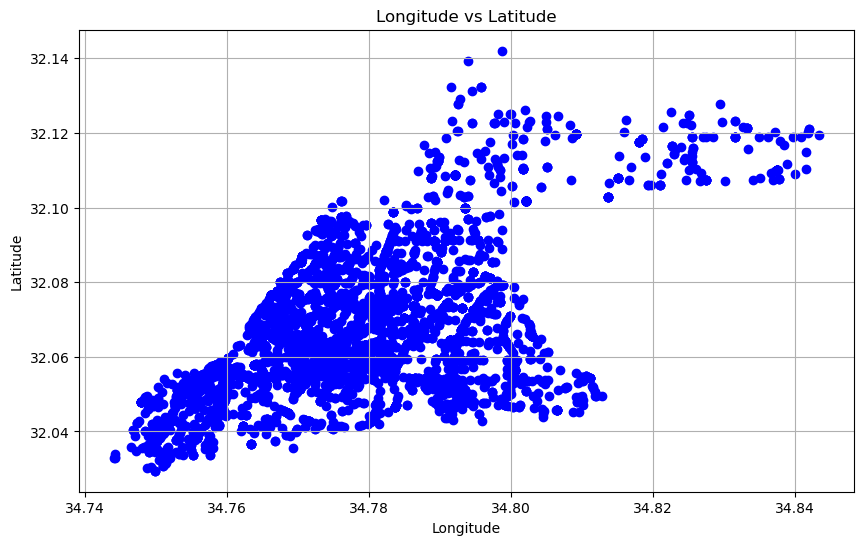

In [25]:
longitude = involved_markers_heb_ta[(involved_markers_heb_ta.involve_vehicle_type == 21) | (involved_markers_heb_ta.involve_vehicle_type == 23)].longitude
latitude = involved_markers_heb_ta[(involved_markers_heb_ta.involve_vehicle_type == 21) | (involved_markers_heb_ta.involve_vehicle_type == 23)].latitude
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c='blue', marker='o')  # Plot the points
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Longitude vs Latitude')
plt.grid(True)
plt.show()

In [26]:
involved_markers_heb_ta.involve_yishuv_name.value_counts()

תל אביב -יפו    33230
חולון            5089
בת ים            4413
רמת גן           3682
ראשון לציון      3445
                ...  
מחנה הילה*          1
בית רימון           1
בית השיטה           1
עמינדב              1
כרמייה              1
Name: involve_yishuv_name, Length: 940, dtype: int64

In [27]:
year = 2020
vehicle_type = 21 # scooter
longitude = involved_markers_heb_ta[(involved_markers_heb_ta.involve_vehicle_type == vehicle_type) &(involved_markers_heb_ta.accident_date.dt.year == year)].longitude.dropna()
latitude = involved_markers_heb_ta[(involved_markers_heb_ta.involve_vehicle_type == vehicle_type) & (involved_markers_heb_ta.accident_date.dt.year == year)].latitude.dropna()

In [28]:
longitude.shape

(334,)

In [29]:
# year = 2021
SCOOTER = 21
E_BICYCLE = 23
vehicle_type = SCOOTER
longitude = involved_markers_heb_ta[(involved_markers_heb_ta.involve_vehicle_type == vehicle_type) ].longitude.dropna()
latitude = involved_markers_heb_ta[(involved_markers_heb_ta.involve_vehicle_type == vehicle_type) ].latitude.dropna()
print(longitude.shape)
import folium

# Create a base map
m = folium.Map(location=[32.05, 34.8], zoom_start=13)  # Use the average latitude and longitude for centering the map


# Add points to the map
for lat, lon in zip(latitude, longitude):
    folium.CircleMarker([lat, lon], radius=2).add_to(m)

# Display the map in Jupyter notebook
m


(1672,)


In [30]:
involved_markers_heb_ta['accident_year'] = involved_markers_heb_ta.accident_date.dt.year


In [31]:
scooter = involved_markers_heb_ta[involved_markers_heb_ta.involve_vehicle_type==21]
e_bicycle = involved_markers_heb_ta[involved_markers_heb_ta.involve_vehicle_type==23]

In [32]:
# Grouping by accident_year and street1_hebrew, then sorting to get the top 5 streets for each year
top_streets_per_year = involved_markers_heb_ta[involved_markers_heb_ta.involve_vehicle_type == 21].groupby(['accident_year', 'street1_hebrew'])['involved_type']\
                           .count().reset_index()

# Function to get top 5 streets for each year
def get_top_streets(year):
    return top_streets_per_year[top_streets_per_year['accident_year'] == year]\
           .sort_values(by='involved_type', ascending=False)\
           .head(5)

# Getting top 5 streets for each year
top_streets_all_years = pd.concat([get_top_streets(year) for year in involved_markers_heb_ta['accident_year'].unique()])

top_streets_all_years


accident_year    street1_hebrew  involved_type
17            2013  קרן קיימת לישראל              3
13            2013               עזה              2
4             2013         ארלוזורוב              2
9             2013          דרך שלמה              2
1             2013         אלון יגאל              2
734           2023        אבן גבירול              6
745           2023         דרך ההגנה              2
759           2023            מרמורק              2
758           2023        מלכי ישראל              2
765           2023       קבוץ גלויות              2
29            2014    דרך נמיר מרדכי              3
32            2014          יצחק שדה              2
23            2014              אצ"ל              1
36            2014             נירים              1
44            2014        שכ תל ברוך              1
46            2015              אילת              1
47            2015          בן יהודה              1
48            2015         גני יהושע              1
49            2015           דיזנגוף              1
50            2015         דרך השלום              1
67            2016           חירותנו              2
58            2016           דיזנגוף              2
75            2016        שד רוטשילד              1
74            2016             ריינס              1
73            2016           רח 3750              1
106           2017        שד רוטשילד              7
77            2017        אבן גבירול              5
84            2017          בן יהודה              3
86            2017           דיזנגוף              3
87            2017          דרך בגין              2
109           2018        אבן גבירול              9
122           2018           דיזנגוף              6
136           2018       המלך ג'ורג'              6
169           2018        שד רוטשילד              4
112           2018             אלנבי              4
180           2019             אלנבי             13
198           2019           דיזנגוף             11
174           2019        אבן גבירול             10
279           2019  רציף הרברט סמואל              8
200           2019          דרך בגין              8
301           2020             אלנבי             15
412           2020  רציף הרברט סמואל             12
323           2020          דרך בגין             11
421           2020        שד רוטשילד             11
321           2020           דיזנגוף             10
432           2021        אבן גבירול             17
466           2021           דיזנגוף             15
525           2021           לוינסקי             12
452           2021          בן יהודה             10
519           2021               יפת              8
623           2022          דרך בגין             22
599           2022             אלנבי             17
724           2022        שד רוטשילד             13
597           2022         אלון יגאל             12
591           2022        אבן גבירול             10

In [33]:
import plotly.express as px

top_streets_2017_2023 = top_streets_all_years[top_streets_all_years.accident_year >2016]

# Creating the grouped bar chart
fig = px.bar(top_streets_2017_2023,
             x='accident_year',
             y='involved_type',
             color='street1_hebrew',
             barmode='group',  # This sets the bars to be grouped
             labels={'accident_year': 'Year', 'involved_type': 'Number of Accidents'},
             title='Accidents Count by Year for Top Streets',
             color_discrete_sequence=px.colors.qualitative.Dark24)

# Adjusting the layout
fig.update_layout(legend_title_text='Street Name')

# Displaying the plot
fig.show()


Examining Day Night Accidents Severity of Scooters and E Bycycles

In [34]:
scooter.groupby(['day_night','accident_severity']).count()

accident_id  provider_and_id  provider_code  \
day_night accident_severity                                                
1         1                            3                3              3   
          2                           93               93             93   
          3                         1010             1010           1010   
5         1                            3                3              3   
          2                           73               73             73   
          3                          490              490            490   

                             file_type_police  involved_type  \
day_night accident_severity                                    
1         1                                 3              3   
          2                                93             93   
          3                              1010           1010   
5         1                                 3              3   
          2                                73             73   
          3                               490            490   

                             involved_type_hebrew  license_acquiring_date  \
day_night accident_severity                                                 
1         1                                     3                       3   
          2                                    93                      93   
          3                                  1010                    1010   
5         1                                     3                       3   
          2                                    73                      73   
          3                                   490                     490   

                             age_group  age_group_hebrew   sex  ...  \
day_night accident_severity                                     ...   
1         1                          3                 3     3  ...   
          2                         93                93    93  ...   
          3                       1010              1010  1010  ...   
5         1                          3                 3     3  ...   
          2                         73                73    73  ...   
          3                        490               490   490  ...   

                             vehicle_status  vehicle_status_hebrew  \
day_night accident_severity                                          
1         1                               3                      0   
          2                              93                      0   
          3                            1010                      0   
5         1                               3                      0   
          2                              73                      0   
          3                             490                      1   

                             vehicle_attribution  vehicle_attribution_hebrew  \
day_night accident_severity                                                    
1         1                                    3                           3   
          2                                   93                          93   
          3                                 1010                        1010   
5         1                                    3                           3   
          2                                   73                          73   
          3                                  490                         490   

                             seats  total_weight  total_weight_hebrew  \
day_night accident_severity                                             
1         1                      3             3                    3   
          2                     93            93                   93   
          3                   1010          1009                 1009   
5         1                      3             3                    3   
          2                     73            73                   73   
        

In [35]:
e_bicycle.groupby(['day_night','accident_severity']).count()

accident_id  provider_and_id  provider_code  \
day_night accident_severity                                                
1         1                            8                8              8   
          2                          151              151            151   
          3                         1971             1971           1971   
5         1                            9                9              9   
          2                           84               84             84   
          3                          873              873            873   

                             file_type_police  involved_type  \
day_night accident_severity                                    
1         1                                 8              8   
          2                               151            151   
          3                              1971           1971   
5         1                                 9              9   
          2                                84             84   
          3                               873            873   

                             involved_type_hebrew  license_acquiring_date  \
day_night accident_severity                                                 
1         1                                     8                       8   
          2                                   151                     151   
          3                                  1971                    1971   
5         1                                     9                       9   
          2                                    84                      84   
          3                                   873                     873   

                             age_group  age_group_hebrew   sex  ...  \
day_night accident_severity                                     ...   
1         1                          8                 8     8  ...   
          2                        151               151   151  ...   
          3                       1971              1971  1971  ...   
5         1                          9                 9     9  ...   
          2                         84                84    84  ...   
          3                        873               873   873  ...   

                             vehicle_status  vehicle_status_hebrew  \
day_night accident_severity                                          
1         1                               8                      0   
          2                             151                      0   
          3                            1971                      0   
5         1                               9                      0   
          2                              84                      0   
          3                             873                      0   

                             vehicle_attribution  vehicle_attribution_hebrew  \
day_night accident_severity                                                    
1         1                                    8                           8   
          2                                  151                         151   
          3                                 1971                        1971   
5         1                                    9                           9   
          2                                   84                          84   
          3                                  873                         873   

                             seats  total_weight  total_weight_hebrew  \
day_night accident_severity                                             
1         1                      8             8                    8   
          2                    151           151                  151   
          3                   1971          1969                 1969   
5         1                      9             9                    9   
          2                     84            84                   84   
        

Day and night severe accidents have similar number, but they are low.

Lets check the location.

In [36]:
scooter_day_lat = scooter[(scooter.day_night == 5) & (scooter.accident_severity == 1)].latitude.dropna()
scooter_day_long = scooter[(scooter.day_night == 5) & (scooter.accident_severity == 1)].longitude.dropna()

m = folium.Map(location=[32.05, 34.8], zoom_start=13)

# Add points to the map
for lat, lon in zip(scooter_day_lat, scooter_day_long):
    folium.CircleMarker([lat, lon], radius=2).add_to(m)
    
m

In [37]:
scooter_day_lat = scooter[(scooter.day_night == 1) & (scooter.accident_severity == 1)].latitude.dropna()
scooter_day_long = scooter[(scooter.day_night == 1) & (scooter.accident_severity == 1)].longitude.dropna()

scooter_night_lat = scooter[(scooter.day_night == 5) & (scooter.accident_severity == 1)].latitude.dropna()
scooter_night_long = scooter[(scooter.day_night == 5) & (scooter.accident_severity == 1)].longitude.dropna()


m = folium.Map(location=[32.05, 34.8], zoom_start=13)

# Add points to the map
for lat, lon in zip(scooter_day_lat, scooter_day_long):    
    folium.Marker(
        location=[lat, lon],
        icon=folium.Icon(icon='1', prefix='fa'),  # choose your fontawesome icon style like this
    ).add_to(m)
    

# Add points to the map
for lat, lon in zip(scooter_night_lat, scooter_night_long):    
    folium.Marker(
        location=[lat, lon],
        icon=folium.Icon(icon='5', prefix='fa'),  # choose your fontawesome icon style like this
    ).add_to(m)
    
m

In [38]:
e_bicycle_day_lat = e_bicycle[(e_bicycle.day_night == 1) & (e_bicycle.accident_severity == 1)].latitude.dropna()
e_bicycle_day_long = e_bicycle[(e_bicycle.day_night == 1) & (e_bicycle.accident_severity == 1)].longitude.dropna()

e_bicycle_night_lat = e_bicycle[(e_bicycle.day_night == 5) & (e_bicycle.accident_severity == 1)].latitude.dropna()
e_bicycle_night_long = e_bicycle[(e_bicycle.day_night == 5) & (e_bicycle.accident_severity == 1)].longitude.dropna()


m = folium.Map(location=[32.05, 34.8], zoom_start=13)

# Add points to the map
for lat, lon in zip(e_bicycle_day_lat, e_bicycle_day_long):    
    folium.Marker(
        location=[lat, lon],
        icon=folium.Icon(icon='1', prefix='fa'),  # choose your fontawesome icon style like this
    ).add_to(m)
    

# Add points to the map
for lat, lon in zip(e_bicycle_night_lat, e_bicycle_night_long):    
    folium.Marker(
        location=[lat, lon],
        icon=folium.Icon(icon='5', prefix='fa'),  # choose your fontawesome icon style like this
    ).add_to(m)
    
m

We have 2 accidents at the same position both at night.

Scooter
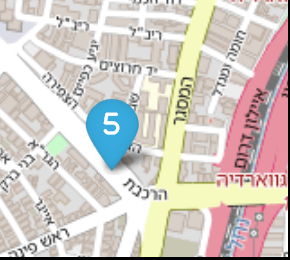

E.Bicycle
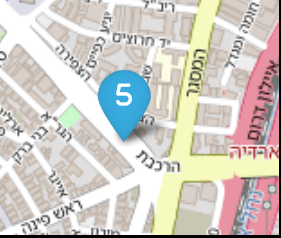

Lets go back and check this location further.
ADD YEAR!

In [39]:
year = 2021
SCOOTER = 21
E_BICYCLE = 23
vehicle_type = E_BICYCLE
longitude = involved_markers_heb_ta[(involved_markers_heb_ta.involve_vehicle_type == vehicle_type) & (involved_markers_heb_ta.accident_severity == 3) ].longitude.dropna()
latitude = involved_markers_heb_ta[(involved_markers_heb_ta.involve_vehicle_type == vehicle_type) & (involved_markers_heb_ta.accident_severity == 3)].latitude.dropna()
print(longitude.shape)
import folium

# Create a base map
m = folium.Map(location=[32.05, 34.8], zoom_start=13)  # Use the average latitude and longitude for centering the map


# Add points to the map
for lat, lon in zip(latitude, longitude):
    folium.CircleMarker([lat, lon], radius=2).add_to(m)

# Display the map in Jupyter notebook
m


(2844,)


In [40]:
involved_markers_heb_ta[(involved_markers_heb_ta.accident_severity == 1) & (involved_markers_heb_ta.involve_vehicle_type == 21)].groupby(['street1_hebrew']).count()

accident_id  provider_and_id  provider_code  file_type_police  \
street1_hebrew                                                                  
אלון יגאל                 1                1              1                 1   
דרך בר-לב חיים            1                1              1                 1   
המסגר                     1                1              1                 1   
הרכבת                     1                1              1                 1   
יהושע בן נון              1                1              1                 1   
שד בן גוריון              1                1              1                 1   

                involved_type  involved_type_hebrew  license_acquiring_date  \
street1_hebrew                                                                
אלון יגאל                   1                     1                       1   
דרך בר-לב חיים              1                     1                       1   
המסגר                       1                     1                       1   
הרכבת                       1                     1                       1   
יהושע בן נון                1                     1                       1   
שד בן גוריון                1                     1                       1   

                age_group  age_group_hebrew  sex  ...  vehicle_status  \
street1_hebrew                                    ...                   
אלון יגאל               1                 1    1  ...               1   
דרך בר-לב חיים          1                 1    1  ...               1   
המסגר                   1                 1    1  ...               1   
הרכבת                   1                 1    1  ...               1   
יהושע בן נון            1                 1    1  ...               1   
שד בן גוריון            1                 1    1  ...               1   

                vehicle_status_hebrew  vehicle_attribution  \
street1_hebrew                                               
אלון יגאל                           0                    1   
דרך בר-לב חיים                      0                    1   
המסגר                               0                    1   
הרכבת                               0                    1   
יהושע בן נון                        0                    1   
שד בן גוריון                        0                    1   

                vehicle_attribution_hebrew  seats  total_weight  \
street1_hebrew                                                    
אלון יגאל                                1      1             1   
דרך בר-לב חיים                           1      1             1   
המסגר                                    1      1             1   
הרכבת                                    1      1             1   
יהושע בן נון                             1      1             1   
שד בן גוריון                             1      1             1   

                total_weight_hebrew  vehicle_damage  vehicle_damage_hebrew  \
street1_hebrew                                                               
אלון יגאל                         1               1                      1   
דרך בר-לב חיים                    1               1                      1   
המסגר                             1               1                      1   
הרכבת                             1               1                      1   
יהושע בן נון                      1               1                      1   
שד בן גוריון                      1               1                      1   

                accident_date  
street1_hebrew                 
אלון יגאל                   1  
דרך בר-לב חיים              1  
המסגר                       1  
הרכבת                       1  
יהושע בן נון                1  
שד בן גוריון                1  

[6 rows x 159 columns]

In [41]:
involved_markers_heb_ta[(involved_markers_heb_ta.accident_severity == 1) & (involved_markers_heb_ta.involve_vehicle_type == 23)].groupby(['street1_hebrew']).count()

accident_id  provider_and_id  provider_code  file_type_police  \
street1_hebrew                                                                  
אור החיים                 1                1              1                 1   
בני אפרים                 1                1              1                 1   
גבעת התחמושת              1                1              1                 1   
דרך ההגנה                 1                1              1                 1   
דרך נמיר מרדכי            2                2              2                 2   
הרכבת                     1                1              1                 1   
לה גארדיה                 1                1              1                 1   
לובטקין צביה              1                1              1                 1   
לח"י                      1                1              1                 1   
מורד הטיילת               1                1              1                 1   
שד ירושלים                3                3              3                 3   
שד רוקח                   3                3              3                 3   

                involved_type  involved_type_hebrew  license_acquiring_date  \
street1_hebrew                                                                
אור החיים                   1                     1                       1   
בני אפרים                   1                     1                       1   
גבעת התחמושת                1                     1                       1   
דרך ההגנה                   1                     1                       1   
דרך נמיר מרדכי              2                     2                       2   
הרכבת                       1                     1                       1   
לה גארדיה                   1                     1                       1   
לובטקין צביה                1                     1                       1   
לח"י                        1                     1                       1   
מורד הטיילת                 1                     1                       1   
שד ירושלים                  3                     3                       3   
שד רוקח                     3                     3                       3   

                age_group  age_group_hebrew  sex  ...  vehicle_status  \
street1_hebrew                                    ...                   
אור החיים               1                 1    1  ...               1   
בני אפרים               1                 1    1  ...               1   
גבעת התחמושת            1                 1    1  ...               1   
דרך ההגנה               1                 1    1  ...               1   
דרך נמיר מרדכי          2                 2    2  ...               2   
הרכבת                   1                 1    1  ...               1   
לה גארדיה               1                 1    1  ...               1   
לובטקין צביה            1                 1    1  ...               1   
לח"י                    1                 1    1  ...               1   
מורד הטיילת             1                 1    1  ...               1   
שד ירושלים              3                 3    3  ...               3   
שד רוקח                 3                 3    3  ...               3   

                vehicle_status_hebrew  vehicle_attribution  \
street1_hebrew                                               
אור החיים                           0                    1   
בני אפרים                           0                    1   
גבעת התחמושת                        0                    1   
דרך ההגנה                           0                    1   
דרך נמיר מרדכי                      0                    2   
הרכבת                               0                    1   
לה גארדיה                           0                    1   
לובטקין צביה                        0                    1   
לח"י                                0                    1   
מורד הטיילת                         0                    1   
שד ירוש

In [42]:
interesting_cols

['injury_severity',
 'injury_severity_hebrew',
 'injured_type',
 'injured_type_hebrew',
 'accident_severity',
 'accident_severity_hebrew',
 'day_night',
 'day_night_hebrew']

Going over road width and accidents.

In [43]:
involved_markers_heb_ta.road_width.value_counts()

0    81002
2     8961
3     8035
4     2428
1     2155
5      482
Name: road_width, dtype: int64

In [44]:
scooter[scooter['road_width'] == 0].groupby(['street1_hebrew','accident_severity'])['accident_id'].count().sort_values()

street1_hebrew  accident_severity
אב              3                     1
ירמיהו          3                     1
ישכון           3                     1
לבנדה           3                     1
לבני איתן       3                     1
                                     ..
אלנבי           3                    32
דרך בגין        3                    34
דיזנגוף         3                    35
שד רוטשילד      3                    43
אבן גבירול      3                    44
Name: accident_id, Length: 313, dtype: int64

In [45]:
scooter[scooter['road_width'] == 1].groupby(['street1_hebrew','accident_severity'])['accident_id'].count().sort_values()

street1_hebrew    accident_severity
יצחק שדה          2                    1
שיינקין           3                    1
כפר גלעדי         2                    1
לבון פנחס         2                    1
לילינבלום         3                    1
                                      ..
דרך בגין          3                    3
דרך דיין משה      2                    3
אבן גבירול        3                    4
רציף הרברט סמואל  2                    5
דרך שלמה          3                    5
Name: accident_id, Length: 73, dtype: int64

In [46]:
scooter[scooter['road_width'] == 2].groupby(['street1_hebrew','accident_severity'])['accident_id'].count().sort_values()

street1_hebrew  accident_severity
יהודה הלוי      3                    1
סולד הנרייטה    3                    1
                2                    1
נמל יפו         3                    1
נחשון           2                    1
                                    ..
לוינסקי         3                    4
אלנבי           3                    6
דרך שלמה        3                    6
אבן גבירול      3                    6
דיזנגוף         3                    7
Name: accident_id, Length: 122, dtype: int64

Check if street is one way!

In [47]:
# accidents_r_w = scooter[scooter['road_width'] == 1]
accidents_r_w = e_bicycle[e_bicycle['road_width'] == 1]

year = 2021
SCOOTER = 21
E_BICYCLE = 23
# vehicle_type = E_BICYCLE
longitude = accidents_r_w.longitude.dropna()
latitude = accidents_r_w.latitude.dropna()

# Create a base map
m = folium.Map(location=[32.05, 34.8], zoom_start=13)  # Use the average latitude and longitude for centering the map

# Add points to the map
for lat, lon in zip(latitude, longitude):
    folium.CircleMarker([lat, lon], radius=2).add_to(m)

# Display the map in Jupyter notebook
m

In [48]:
scooter[(~scooter['street1_hebrew'].isna()) &(scooter['street1_hebrew'].str.contains('הרברט סמואל'))]

accident_id  provider_and_id  provider_code  file_type_police  \
24082    2014078587      12014078587              1                 1   
64458    2018049410      32018049410              3                 3   
68739    2018098307      32018098307              3                 3   
69973    2019003500      32019003500              3                 3   
71375    2019021622      32019021622              3                 3   
71768    2019025516      12019025516              1                 1   
74591    2019058068      32019058068              3                 3   
75705    2019065826      12019065826              1                 1   
75747    2019065540      32019065540              3                 3   
78253    2019096759      32019096759              3                 3   
78290    2019095258      32019095258              3                 3   
79268    2020010685      12020010685              1                 1   
80500    2020029570      32020029570              3                 3   
80612    2020028969      32020028969              3                 3   
81961    2020044286      12020044286              1                 1   
82421    2020055012      32020055012              3                 3   
83046    2020067928      12020067928              1                 1   
84093    2020093548      12020093548              1                 1   
85149    2020082360      12020082360              1                 1   
85201    2020090365      32020090365              3                 3   
85284    2020091032      32020091032              3                 3   
85325    2020090365      32020090365              3                 3   
85683    2021012907      12021012907              1                 1   
85723    2021009431      12021009431              1                 1   
85886    2020093580      32020093580              3                 3   
88793    2021025967      12021025967              1                 1   
91184    2021060061      12021060061              1                 1   
91806    2021068376      32021068376              3                 3   
92851    2021089030      32021089030              3                 3   
93220    2021091031      32021091031              3                 3   
95140    2022022962      12022022962              1                 1   
95266    2022022962      12022022962              1                 1   
98776    2022061609      32022061609              3                 3   
98933    2022061609      32022061609              3                 3   
99601    2022073643      32022073643              3                 3   
100855   2022089256      32022089256              3                 3   
102049   2023024056      32023024056              3                 3   

        involved_type involved_type_hebrew  license_acquiring_date  age_group  \
24082               1                  נהג                       0         99   
64458               1                  נהג                       0         99   
68739               1                  נהג                       0         99   
69973               1                  נהג                       0          5   
71375               2             נהג נפגע                       0          7   
71768               1                  נהג                       0         99   
74591               1                  נהג                       0         99   
75705               2             נהג נפגע                       0         99   
75747               1                  נהג                       0         99   
78253               2             נהג נפגע                       0          5   
78290               2             נהג נפגע                       0          6   
79268               1                  נהג                    2012          6   
80500               2             נהג נפגע                    2019          6   
80612               1                  נהג                       0         99   
81961             

For road that has a width between 2.5 - 7 meters there is an interesting spot on Herbert Samuel close to Bugrashov.<br>
Bugrashov did have construction work on, so it's interesting these accidents happened while the construction was done.

from 2019 - 2022 there has an increase in accidents.



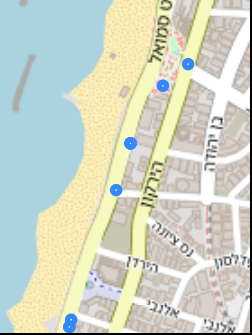

Checking one way streets accidents

In [49]:
scooter.one_lane

630       1
1243      9
1578      9
1579      9
2885      9
         ..
102925    3
102928    9
102937    9
103005    9
103062    9
Name: one_lane, Length: 1672, dtype: int64

# Adding GIS Bicycle Lanes

Things that are missing:
1. GIS information regarding vehicle lanes, this data can help understand what roads are the most dangerous.
    * Can I use the accidents data? maybe street_1.

Questions:
1. I see that there are more bicycle lanes in shp file than xlxs file, what is the difference?

Q: What do I want?</br>
A: To show how accidents in MM change after a BP is opened.

**Idea on how to show:<br>**
A function that takes a BP and shows a map of the area.<br>
The we want to see accidents in that area before and after the BP opens.  <br>
In order to do that The function:

Will show several maps of the same area before the BP and after the BP

In [50]:
import geopandas as gpd

# Load the shapefile
bicycle_paths = gpd.read_file("./csv_tables/tel_avlv_bycicle_UTM/Bicycle Routes.shp")

# changing col names to fit other dataframes 
bicycle_paths.columns =['oid_shvil', 'msorech', 'dateimport', 'width', 'direction', 'bitzua',
       'shemmikta', 'miflas', 'datecreate', 'geometry']

bicycle_paths.oid_shvil = pd.to_numeric(bicycle_paths.oid_shvil, downcast='integer')
bicycle_paths.bitzua    = bicycle_paths.bitzua.fillna(-1).astype(int)
bicycle_paths.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [51]:
bicycle_paths[bicycle_paths.oid_shvil == 280]

oid_shvil  msorech           dateimport  width direction  bitzua  \
549        280  1616.24  11/02/2024 00:31:49    2.5      None    2021   
550        280  1616.24  11/02/2024 00:31:49    2.5      None    2021   
551        280  1616.24  11/02/2024 00:31:49    2.5      None    2021   
552        280  1616.24  11/02/2024 00:31:49    2.5      None    2021   
553        280  1616.24  11/02/2024 00:31:49    2.5      None    2021   
554        280  1616.24  11/02/2024 00:31:49    2.5      None    2021   
555        280  1616.24  11/02/2024 00:31:49    2.5      None    2021   
556        280  1616.24  11/02/2024 00:31:49    2.5      None    2021   

                   shemmikta miflas datecreate  \
549  הרצל מדרך יפו עד בן צבי   כביש       None   
550  הרצל מדרך יפו עד בן צבי   כביש       None   
551  הרצל מדרך יפו עד בן צבי   כביש       None   
552  הרצל מדרך יפו עד בן צבי   כביש       None   
553  הרצל מדרך יפו עד בן צבי   כביש       None   
554  הרצל מדרך יפו עד בן צבי   כביש       None   
555  הרצל מדרך יפו עד בן צבי   כביש       None   
556  הרצל מדרך יפו עד בן צבי   כביש       None   

                                              geometry  
549  LINESTRING (34.76863 32.04589, 34.76873 32.046...  
550  LINESTRING (34.76900 32.04705, 34.76904 32.047...  
551  LINESTRING (34.77080 32.05487, 34.77082 32.054...  
552  LINESTRING (34.77081 32.05488, 34.77081 32.055...  
553  LINESTRING (34.77079 32.05578, 34.77079 32.056...  
554  LINESTRING (34.77079 32.05674, 34.77079 32.05674)  
555  LINESTRING (34.77079 32.05674, 34.77080 32.05715)  
556  LINESTRING (34.77080 32.05715, 34.77081 32.057...

In [52]:

# Path to your Excel file
excel_file_path = "./csv_tables/tel_avlv_bycicle_UTM/export.xlsx"

# Load the Excel file
bicycle_paths_meta_data = pd.read_excel(excel_file_path, engine='openpyxl')

bicycle_paths_meta_data.bitzua = bicycle_paths_meta_data.bitzua.fillna(-1).astype(int)
# Display the first few rows of the dataframe
bicycle_paths_meta_data[~bicycle_paths_meta_data.date_created.isna()]


oid_shvil  ms_orech          date_import  width direction  bitzua  \
4            5    362.67  11/02/2024 00:31:49    2.0   דו סטרי    2018   
15          16   1853.03  11/02/2024 00:31:49    3.5   דו סטרי    2022   
30          31    920.95  11/02/2024 00:31:49    1.6       NaN    2021   
38          39    200.08  11/02/2024 00:31:49    2.0       NaN    2021   
76          77    164.29  11/02/2024 00:31:49    2.4   דו סטרי    2021   
..         ...       ...                  ...    ...       ...     ...   
429        430    212.81  11/02/2024 00:31:49    2.5   דו סטרי    2023   
431        432   1083.02  11/02/2024 00:31:49    2.5   דו סטרי    2023   
439        440   2210.57  11/02/2024 00:31:49    2.5   חד סטרי    2023   
448        449   2168.04  11/02/2024 00:31:49    2.5   חד סטרי    2023   
452        453    268.59  11/02/2024 00:31:49    2.5   דו סטרי    2023   

                                            shem_mikta miflas date_created  
4            רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר    NaN   30/06/2018  
15                               פארק הירקון שביל 7.10  מדרכה   01/01/2022  
30                       נמיר מהרב גורן עד דורי שביל 7   כביש   01/09/2021  
38           מרמורק מזרח מאבן גבירול עד הוברמן (מחודש)   כביש   29/04/2021  
76                         קרליבך מ- 454 עד ביליס מנחם   כביש   01/12/2021  
..                                                 ...    ...          ...  
429                                      גשר איינשטיין   כביש   30/10/2023  
431                          נמיר מפרופס עד איינשטיין    כביש   30/11/2023  
439  אבן גבירול החדש/2040 מפרופס עד יוניצ'מן גדה מז...   כביש   01/12/2023  
448  אבן גבירול החדש/2040 מפרופס עד יוניצמן גדה מערבית   כביש   01/12/2023  
452                           נמיר מרוקח עד חיים לבנון   כביש   01/11/2023  

[193 rows x 9 columns]

In [53]:
bicycle_paths_meta_data

oid_shvil  ms_orech          date_import  width direction  bitzua  \
0            1     95.10  11/02/2024 00:31:49    2.5   דו סטרי    2012   
1            2    201.14  11/02/2024 00:31:49    2.5   דו סטרי    2013   
2            3    696.31  11/02/2024 00:31:49    2.1   דו סטרי    2004   
3            4    659.20  11/02/2024 00:31:49    2.5   דו סטרי    2018   
4            5    362.67  11/02/2024 00:31:49    2.0   דו סטרי    2018   
..         ...       ...                  ...    ...       ...     ...   
451        452    172.22  11/02/2024 00:31:49    1.5       NaN    2016   
452        453    268.59  11/02/2024 00:31:49    2.5   דו סטרי    2023   
453        454     24.93  11/02/2024 00:31:49    NaN       NaN      -1   
454        455    155.53  11/02/2024 00:31:49    2.5   דו סטרי    2022   
455        456    237.22  11/02/2024 00:31:49    NaN       NaN      -1   

                                    shem_mikta miflas date_created  
0                         נמיר מיוניצ'מן דרומה    NaN          NaN  
1                   פרופס מנמיר עד קדושי השואה    NaN          NaN  
2     יאיר רוזנבלום מאורי צבי גרינברג עד פרופס    NaN          NaN  
3                     קק"ל מנמיר עד חיים לבנון  מדרכה          NaN  
4    רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר    NaN   30/06/2018  
..                                         ...    ...          ...  
451            הגדוד העברי מללוינסקי עד צ'לנוב    NaN          NaN  
452                   נמיר מרוקח עד חיים לבנון   כביש   01/11/2023  
453                                        NaN    NaN          NaN  
454                            גשר רדינג ווקוף   כביש          NaN  
455                                        NaN    NaN          NaN  

[456 rows x 9 columns]

## Merging bicycle paths with meta data

In [54]:
bicycle_paths_and_meta_data = pd.merge(bicycle_paths, bicycle_paths_meta_data, how='right', on='oid_shvil')
bicycle_paths_and_meta_data.head()

oid_shvil  msorech           dateimport  width_x direction_x  bitzua_x  \
0          1    95.10  11/02/2024 00:31:49      2.5     דו סטרי      2012   
1          2   201.14  11/02/2024 00:31:49      2.5     דו סטרי      2013   
2          3   696.31  11/02/2024 00:31:49      2.1     דו סטרי      2004   
3          4   659.20  11/02/2024 00:31:49      2.5     דו סטרי      2018   
4          5   362.67  11/02/2024 00:31:49      2.0     דו סטרי      2018   

                                   shemmikta miflas_x datecreate  \
0                       נמיר מיוניצ'מן דרומה     None       None   
1                 פרופס מנמיר עד קדושי השואה     None       None   
2   יאיר רוזנבלום מאורי צבי גרינברג עד פרופס     None       None   
3                   קק"ל מנמיר עד חיים לבנון    מדרכה       None   
4  רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר     None       None   

                                            geometry  ms_orech  \
0  LINESTRING (34.80054 32.14000, 34.80089 32.140...     95.10   
1  LINESTRING (34.79394 32.12300, 34.79327 32.123...    201.14   
2  LINESTRING (34.79394 32.12300, 34.79413 32.123...    696.31   
3  LINESTRING (34.79522 32.12243, 34.79581 32.122...    659.20   
4  LINESTRING (34.80148 32.12168, 34.80166 32.122...    362.67   

           date_import  width_y direction_y  bitzua_y  \
0  11/02/2024 00:31:49      2.5     דו סטרי      2012   
1  11/02/2024 00:31:49      2.5     דו סטרי      2013   
2  11/02/2024 00:31:49      2.1     דו סטרי      2004   
3  11/02/2024 00:31:49      2.5     דו סטרי      2018   
4  11/02/2024 00:31:49      2.0     דו סטרי      2018   

                                  shem_mikta miflas_y date_created  
0                       נמיר מיוניצ'מן דרומה      NaN          NaN  
1                 פרופס מנמיר עד קדושי השואה      NaN          NaN  
2   יאיר רוזנבלום מאורי צבי גרינברג עד פרופס      NaN          NaN  
3                   קק"ל מנמיר עד חיים לבנון    מדרכה          NaN  
4  רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר      NaN   30/06/2018

## This code is meant to check in plotting and matching accidents with BP

### Explanation on problems that rose with getting this code:

**Initial Problems**

    Buffer Operation in Geographic CRS Warning: The warning message you encountered when attempting to buffer in a geographic CRS (EPSG:4326) was a critical indicator of a potential issue. In a geographic CRS, distances are in degrees of latitude and longitude, which do not translate uniformly into physical distances on the ground due to the Earth's curvature. The warning advised re-projecting geometries to a projected CRS (which uses uniform units like meters or feet) before performing distance-based operations like buffering.

    Empty Results from Spatial Join: After re-projecting to a suitable projected CRS and performing the buffer operation correctly in terms of geometry, the spatial join between the buffered bicycle paths and the accidents still resulted in an empty dataset. This outcome suggested a misalignment or an issue with how the spatial operations were being conducted, particularly concerning the CRS used for these operations and the spatial relationship between the datasets.

**Solutions and Learning Points
Addressing the Buffer Warning**

    Correct CRS for Buffering: The solution involved re-projecting the bicycle paths from the geographic CRS (EPSG:4326) to a projected CRS that uses meters for distance measurements (EPSG:2039 for Israel TM Grid, in this context). This step ensured that the buffer operation would use a uniform distance measure around the paths, making the operation geometrically meaningful.

Resolving the Empty Spatial Join Results

    CRS Alignment for Spatial Operations: Initially, performing operations directly in the projected CRS did not yield expected results due to potential misalignment issues or other spatial discrepancies. The effective solution was to perform the buffer operation in the projected CRS but then convert the buffered geometries back to the original geographic CRS for the spatial join. This approach leveraged the accuracy of projected CRS for distance-based operations while maintaining the spatial integrity of the original data for successful joins.

    Adjusting Buffer Distance and CRS Management: Fine-tuning the buffer distance after understanding the scale and context of your data in the projected CRS, and then carefully managing the CRS transformation back to the geographic CRS for spatial joins, was crucial. This dual-CRS approach allowed for accurate geometric operations while preserving the spatial relationships necessary for identifying intersections between accidents and buffered bicycle paths.

**Key Takeaways**

    CRS Awareness: Understanding the implications of the coordinate reference system in use, especially the differences between geographic (latitude/longitude) and projected (uniform distance units) CRSs, is vital for spatial analysis.

    GeoPandas and CRS Transformations: GeoPandas provides powerful tools for CRS transformations (to_crs()) and spatial operations (buffer(), sjoin()). Correctly applying these tools requires attention to the spatial scale, accuracy, and the specific requirements of your analysis.

    Spatial Data Integrity: Ensuring spatial data integrity through careful CRS management allows for more accurate and meaningful spatial analysis results. When faced with CRS-related challenges, consider transforming your data to best suit each operation's needs, sometimes requiring a hybrid approach of using different CRSs at different analysis stages.

By addressing these issues with informed adjustments to the CRS and spatial operations, you were able to accurately identify intersections between accidents and bicycle paths, overcoming the initial challenges and leading to successful spatial analysis.

In [124]:
## Will use the nearest point DF created earlier and combine them with buffered 
## Why?
### I will use distance to validate street match

import geopandas as gpd
import fiona

# List all layers in the GeoPackage
layers = fiona.listlayers("nearest_points.gpkg")

# Print available layers
print("Available layers:", layers)

# Load a specific layer (replace 'layer_name' with the actual name of the layer you want to load)
accidents_and_bp = gpd.read_file("nearest_points.gpkg", layer='nearest_points')
accidents_and_bp

Available layers: ['nearest_points']


accident_id  provider_and_id  provider_code  file_type_police  \
0      2013001368      32013001368              3                 3   
1      2023087892      32023087892              3                 3   
2      2013001742      32013001742              3                 3   
3      2023076480      32023076480              3                 3   
4      2013001350      12013001350              1                 1   
...           ...              ...            ...               ...   
7792   2023098397      32023098397              3                 3   
7793   2023093021      12023093021              1                 1   
7794   2023096873      32023096873              3                 3   
7795   2023094045      12023094045              1                 1   
7796   2023091245      32023091245              3                 3   

      involved_type involved_type_hebrew  license_acquiring_date  age_group  \
0                 2             נהג נפגע                       0          6   
1                 1                  נהג                       0         99   
2                 2             נהג נפגע                       0          7   
3                 2             נהג נפגע                       0          8   
4                 2             נהג נפגע                       0          5   
...             ...                  ...                     ...        ...   
7792              2             נהג נפגע                       0          8   
7793              2             נהג נפגע                       0         11   
7794              2             נהג נפגע                       0         10   
7795              2             נהג נפגע                       0          5   
7796              2             נהג נפגע                    2010          7   

     age_group_hebrew  sex  ...           dateimport  width direction  \
0               25-29  1.0  ...  11/02/2024 00:31:49    2.5   דו סטרי   
1             לא ידוע  0.0  ...  11/02/2024 00:31:49    2.5   דו סטרי   
2               30-34  2.0  ...  11/02/2024 00:31:49    3.0      None   
3               35-39  1.0  ...  11/02/2024 00:31:49    2.5      None   
4               20-24  1.0  ...  11/02/2024 00:31:49    3.0      None   
...               ...  ...  ...                  ...    ...       ...   
7792            35-39  1.0  ...  11/02/2024 00:31:49    2.5   דו סטרי   
7793            50-54  1.0  ...  11/02/2024 00:31:49    2.5      None   
7794            45-49  1.0  ...  11/02/2024 00:31:49    2.0      None   
7795            20-24  1.0  ...  11/02/2024 00:31:49    2.0   דו סטרי   
7796            30-34  2.0  ...  11/02/2024 00:31:49    2.5   דו סטרי   

      create_year                          street_name  miflas create_date  \
0            2021     בוגרשוב משדרות בן ציון עד הירקון    כביש        None   
1            2022      צומת יצחק שדה לינקולן גשר מעריב    כביש        None   
2            2000       רוטשילד מיהושע התלמי עד מרמורק   מדרכה        None   
3            2021              הרצל מדרך יפו עד בן צבי    כביש        None   
4            2000       רוטשילד מיהושע התלמי עד מרמורק   מדרכה        None   
...           ...                                  ...     ...         ...   
7792         2020          דניאל הירקון עד הרברט סמואל    כביש        None   
7793         2022      מנחם בגין מחשמונאים עד יצחק שדה    כביש        None   
7794         2020  הרב גורן (דרומי) מספיר פנחס עד נמיר   מדרכה        None   
7795         2004                    הטייסים גד דרומית    None        None   
7796         2012         נורדאו מאבן גבירול עד הירקון    None        None   

                                               poly_geo  distance  \
0     POLYGON ((34.7754519328181289 32.0739262631411...  0.000536   
1     POLYGON ((34.7833792694064670 32.0658983791241...  0.000110   
2     POLYGON ((34.7773273779863032 32.0659776255176...  0.000726   
3     POLYGON ((34.7708490047805725 32.0546827627493...  0.000000   
4     POLYGON ((34.7701536891197875 32.062883

In [125]:
accidents_and_bp.rename
accidents_and_bp.rename({'street_name': 'street_name_nearest', 'geometry':'geometry_nearest'}, axis=1, inplace=True)

In [126]:
accidents_and_bp_only_needed = accidents_and_bp[['accident_id', 'involve_id','street_name_nearest', 'geometry_nearest','distance']].copy()
accidents_and_bp_only_needed

accident_id  involve_id                  street_name_nearest  \
0      2013001368           1     בוגרשוב משדרות בן ציון עד הירקון   
1      2023087892           2      צומת יצחק שדה לינקולן גשר מעריב   
2      2013001742           2       רוטשילד מיהושע התלמי עד מרמורק   
3      2023076480           1              הרצל מדרך יפו עד בן צבי   
4      2013001350           1       רוטשילד מיהושע התלמי עד מרמורק   
...           ...         ...                                  ...   
7792   2023098397           2          דניאל הירקון עד הרברט סמואל   
7793   2023093021           1      מנחם בגין מחשמונאים עד יצחק שדה   
7794   2023096873           2  הרב גורן (דרומי) מספיר פנחס עד נמיר   
7795   2023094045           2                    הטייסים גד דרומית   
7796   2023091245           1         נורדאו מאבן גבירול עד הירקון   

               geometry_nearest  distance  
0     POINT (34.77509 32.07349)  0.000536  
1     POINT (34.78377 32.06605)  0.000110  
2     POINT (34.77215 32.06241)  0.000726  
3     POINT (34.77084 32.05481)  0.000000  
4     POINT (34.76937 32.06297)  0.000115  
...                         ...       ...  
7792  POINT (34.76429 32.06861)  0.000067  
7793  POINT (34.78779 32.06935)  0.000000  
7794  POINT (34.79533 32.09134)  0.000466  
7795  POINT (34.80482 32.05382)  0.003000  
7796  POINT (34.77799 32.09053)  0.001693  

[7797 rows x 5 columns]

In [127]:
from shapely.geometry import Point

# Load the shapefile
bicycle_paths = gpd.read_file("./csv_tables/tel_avlv_bycicle_UTM/Bicycle Routes.shp")

# Change column names to fit other dataframes 
bicycle_paths.columns = ['oid_shvil', 'msorech', 'dateimport', 'width', 'direction', 'create_year',
                         'street_name', 'miflas', 'create_date', 'geometry']

# Convert column types
bicycle_paths.oid_shvil = pd.to_numeric(bicycle_paths.oid_shvil, downcast='integer')
bicycle_paths.create_year = bicycle_paths.create_year.fillna(-1).astype(int)

# Print the original CRS
print("Original CRS:", bicycle_paths.crs)

# Apply the buffer in meters after reprojection
bicycle_paths = bicycle_paths.to_crs(epsg=2039)  # Project to EPSG:2039 for buffering

bicycle_paths_big_overlap = bicycle_paths.copy()
bicycle_paths_small_overlap = bicycle_paths.copy()

# Buffer in meters
big_buffer_width_meters = 30  
small_buffer_width_meters = 3
# Buffer the geometries
big_buffered_geometries = bicycle_paths.geometry.buffer(big_buffer_width_meters)
small_buffered_geometries = bicycle_paths.geometry.buffer(small_buffer_width_meters)

# Update the original GeoDataFrame's geometry column
bicycle_paths_big_overlap['geometry'] = big_buffered_geometries
bicycle_paths_small_overlap['geometry'] = small_buffered_geometries

# If needed, convert back to original CRS
bicycle_paths_big_overlap = bicycle_paths_big_overlap.to_crs(epsg=4326)
bicycle_paths_small_overlap = bicycle_paths_small_overlap.to_crs(epsg=4326)

#### Add geometry to accidents data frame

# Load accident data
i_m_h_ta_micro_m = involved_markers_heb_ta[(involved_markers_heb_ta.involve_vehicle_type.isin(micro_m))  ]
longitude = involved_markers_heb_ta[(involved_markers_heb_ta.involve_vehicle_type.isin(micro_m))].longitude.dropna()
latitude = involved_markers_heb_ta[(involved_markers_heb_ta.involve_vehicle_type.isin(micro_m))].latitude.dropna()
# Convert DataFrame to GeoDataFrame
accidents_gdf = gpd.GeoDataFrame(
    i_m_h_ta_micro_m,
    geometry=[Point(xy) for xy in zip(longitude, latitude)]
)
accidents_gdf.crs = bicycle_paths_big_overlap.crs

accidents_gdf_merged_with_nearest = pd.merge(accidents_gdf, accidents_and_bp_only_needed, on=['accident_id', 'involve_id'], how='left')
accidents_gdf_merged_with_nearest

Original CRS: EPSG:4326


accident_id  provider_and_id  provider_code  file_type_police  \
0      2013001368      32013001368              3                 3   
1      2023087892      32023087892              3                 3   
2      2013001742      32013001742              3                 3   
3      2023076480      32023076480              3                 3   
4      2013001350      12013001350              1                 1   
...           ...              ...            ...               ...   
7792   2023098397      32023098397              3                 3   
7793   2023093021      12023093021              1                 1   
7794   2023096873      32023096873              3                 3   
7795   2023094045      12023094045              1                 1   
7796   2023091245      32023091245              3                 3   

      involved_type involved_type_hebrew  license_acquiring_date  age_group  \
0                 2             נהג נפגע                       0          6   
1                 1                  נהג                       0         99   
2                 2             נהג נפגע                       0          7   
3                 2             נהג נפגע                       0          8   
4                 2             נהג נפגע                       0          5   
...             ...                  ...                     ...        ...   
7792              2             נהג נפגע                       0          8   
7793              2             נהג נפגע                       0         11   
7794              2             נהג נפגע                       0         10   
7795              2             נהג נפגע                       0          5   
7796              2             נהג נפגע                    2010          7   

     age_group_hebrew  sex  ... seats  total_weight total_weight_hebrew  \
0               25-29  1.0  ...  99.0           0.0             לא ידוע   
1             לא ידוע  0.0  ...  99.0           0.0             לא ידוע   
2               30-34  2.0  ...  99.0           0.0             לא ידוע   
3               35-39  1.0  ...  99.0           0.0             לא ידוע   
4               20-24  1.0  ...  99.0           0.0             לא ידוע   
...               ...  ...  ...   ...           ...                 ...   
7792            35-39  1.0  ...  99.0           0.0             לא ידוע   
7793            50-54  1.0  ...  99.0           0.0             לא ידוע   
7794            45-49  1.0  ...  99.0           0.0             לא ידוע   
7795            20-24  1.0  ...  99.0           0.0             לא ידוע   
7796            30-34  2.0  ...  99.0           0.0             לא ידוע   

      vehicle_damage vehicle_damage_hebrew       accident_date  \
0                4.0               אין נזק 2013-07-27 01:00:00   
1                0.0               לא ידוע 2023-02-01 06:30:00   
2                4.0               אין נזק 2013-10-07 01:30:00   
3                4.0               אין נזק 2023-01-07 07:00:00   
4                4.0               אין נזק 2013-08-25 01:00:00   
...              ...                   ...                 ...   
7792             4.0               אין נזק 2023-02-11 01:30:00   
7793             4.0               אין נזק 2023-02-19 22:30:00   
7794             1.0                    קל 2023-02-19 06:15:00   
7795             3.0                   קשה 2023-03-13 18:00:00   
7796             4.0               אין נזק 2023-03-05 20:30:00   

                       geometry                  street_name_nearest  \
0     POINT (34.77509 32.07349)     בוגרשוב משדרות בן ציון עד הירקון   
1     POINT (34.78377 32.06605)      צומת יצחק שדה לינקולן גשר מעריב   
2     POINT (34.77215 32.06241)       רוטשילד מיהושע התלמי עד מרמורק   
3     POINT (34.77084 32.05481)              הרצל מדרך יפו עד בן צבי   
4     POINT (34.76937 32.06297)       רוטשילד מיהושע התלמי עד מרמורק   
...                         ...                                  ...   
7792  

In [128]:


#### ALL THIS LOWER PART IS REDUNDENT SINCE WE ARE CALCULATING THE ACCIDENTS TO BP IN ANOTHER WAY
print("accidents_gdf:",accidents_gdf_merged_with_nearest.crs,"bicycle_paths_buffered:", bicycle_paths_big_overlap.crs, bicycle_paths_small_overlap.crs)

# Copying the geometry so I can count accidents by segment
bicycle_paths_big_overlap['poly_geo']  = bicycle_paths_big_overlap.geometry
bicycle_paths_small_overlap['poly_geo'] = bicycle_paths_small_overlap.geometry

# Ensure 'geometry' is included to maintain GeoDataFrame structure
bicycle_paths_selected_cols = bicycle_paths_big_overlap[['oid_shvil', 'street_name', 'create_year', 'create_date', 'geometry', 'poly_geo']]



# Perform the spatial join
accidents_on_big_buffered_paths = gpd.sjoin(accidents_gdf_merged_with_nearest, bicycle_paths_selected_cols, how="inner", op='intersects')
accidents_on_big_buffered_paths = gpd.sjoin(accidents_gdf_merged_with_nearest, bicycle_paths_big_overlap, how="inner", op='intersects')

accidents_on_small_buffered_paths = gpd.sjoin(accidents_gdf_merged_with_nearest, bicycle_paths_selected_cols, how="inner", op='intersects')
accidents_on_small_buffered_paths = gpd.sjoin(accidents_gdf_merged_with_nearest, bicycle_paths_small_overlap, how="inner", op='intersects')


print('i_m_h_ta_micro_m: ',i_m_h_ta_micro_m.shape)
print( 'accidents_gdf :',accidents_gdf.shape)
print('accident_big_buff:',accidents_on_big_buffered_paths.shape )
print( 'accident_small buff:',accidents_on_small_buffered_paths.shape)




accidents_gdf: EPSG:4326 bicycle_paths_buffered: EPSG:4326 EPSG:4326
i_m_h_ta_micro_m:  (7797, 160)
accidents_gdf : (7797, 161)
accident_big_buff: (6363, 175)
accident_small buff: (499, 175)


In [74]:
accidents_gdf

accident_id  provider_and_id  provider_code  file_type_police  \
15       2013001368      32013001368              3                 3   
58       2023087892      32023087892              3                 3   
78       2013001742      32013001742              3                 3   
94       2023076480      32023076480              3                 3   
123      2013001350      12013001350              1                 1   
...             ...              ...            ...               ...   
103005   2023098397      32023098397              3                 3   
103021   2023093021      12023093021              1                 1   
103037   2023096873      32023096873              3                 3   
103039   2023094045      12023094045              1                 1   
103062   2023091245      32023091245              3                 3   

        involved_type involved_type_hebrew  license_acquiring_date  age_group  \
15                  2             נהג נפגע                       0          6   
58                  1                  נהג                       0         99   
78                  2             נהג נפגע                       0          7   
94                  2             נהג נפגע                       0          8   
123                 2             נהג נפגע                       0          5   
...               ...                  ...                     ...        ...   
103005              2             נהג נפגע                       0          8   
103021              2             נהג נפגע                       0         11   
103037              2             נהג נפגע                       0         10   
103039              2             נהג נפגע                       0          5   
103062              2             נהג נפגע                    2010          7   

       age_group_hebrew  sex  ... vehicle_status_hebrew  vehicle_attribution  \
15                25-29  1.0  ...                   NaN                  1.0   
58              לא ידוע  0.0  ...                   NaN                  1.0   
78                30-34  2.0  ...                   NaN                  1.0   
94                35-39  1.0  ...                   NaN                  1.0   
123               20-24  1.0  ...                   NaN                  1.0   
...                 ...  ...  ...                   ...                  ...   
103005            35-39  1.0  ...                   NaN                  1.0   
103021            50-54  1.0  ...                   NaN                  1.0   
103037            45-49  1.0  ...                   NaN                  1.0   
103039            20-24  1.0  ...                   NaN                  1.0   
103062            30-34  2.0  ...                   NaN                  1.0   

       vehicle_attribution_hebrew  seats total_weight  total_weight_hebrew  \
15                         ישראלי   99.0          0.0              לא ידוע   
58                         ישראלי   99.0          0.0              לא ידוע   
78                         ישראלי   99.0          0.0              לא ידוע   
94                         ישראלי   99.0          0.0              לא ידוע   
123                        ישראלי   99.0          0.0              לא ידוע   
...                           ...    ...          ...                  ...   
103005                     ישראלי   99.0          0.0              לא ידוע   
103021                     ישראלי   99.0          0.0              לא ידוע   
103037                     ישראלי   99.0          0.0              לא ידוע   
103039                     ישראלי   99.0          0.0              לא ידוע   
103062                     ישראלי   99.0          0.0              לא ידוע   

       vehicle_damage  vehicle_damage_hebrew       accident_date  \
15                4.0                אין נזק 2013-07-27 01:00:00   
58                0.0                לא ידוע 2023-02-01 06:30:00   
78                4.0                אין נזק 2013-10-07 

## Calculating Accidents point related to BP by distance

In [56]:
# import geopandas as gpd
# from shapely.geometry import Point, LineString
# from shapely.ops import nearest_points

# bicycle_paths_small_overlap.drop(columns=['geometry'], inplace=True)

# # Initialize an empty list to store combined row data along with nearest point geometry

# bicycle_paths_small_overlap
# combined_data_list = []

# for row_ in accidents_gdf.iterrows():
#     row_data_acci = row_[1]
#     point = row_data_acci['geometry']

#     min_distance = float('inf')
#     nearest_point = None
#     combined_row_data = None
#     for row in bicycle_paths_small_overlap.iterrows():
#         row_data_bp = row[1]
#         poly = row_data_bp['poly_geo']
#         point_on_poly = nearest_points(point, poly)[1]
#         distance = point.distance(point_on_poly)
#         if distance < min_distance:
#             min_distance = distance
#             nearest_point = point_on_poly
#             # Combine the data from accidents and bicycle paths into a single dictionary
#             combined_row_data = {**row_data_acci.to_dict(), **row_data_bp.to_dict(), 'distance':min_distance}

#     if combined_row_data:
#         combined_data_list.append(combined_row_data)

# # Convert the combined data list into a GeoDataFrame
# nearest_points_gdf = gpd.GeoDataFrame(combined_data_list)

# # Set the geometry to the nearest points
# # nearest_points_gdf.set_geometry('nearest_point', inplace=True)

# print(nearest_points_gdf)

### Creating file from the merged accidents and BP

In [57]:
# from shapely.wkt import dumps

# # Assuming 'poly_geo' is the column with Polygon objects
# nearest_points_gdf['poly_geo'] = nearest_points_gdf['poly_geo'].apply(dumps)

# nearest_points_gdf.to_file("nearest_points.gpkg", driver="GPKG")

In [129]:
# import geopandas as gpd
# import fiona

# # List all layers in the GeoPackage
# layers = fiona.listlayers("nearest_points.gpkg")

# # Print available layers
# print("Available layers:", layers)

# # Load a specific layer (replace 'layer_name' with the actual name of the layer you want to load)
# accidents_and_bp = gpd.read_file("nearest_points.gpkg", layer='nearest_points')
# accidents_and_bp

### Using this new accidents_and_bp we will validate the accidents to the BP

How?

Look at the street name in accident and check if it is related to the BP street name.<br>
This is going to be manual

## End of attempt to use nearest distance to BP

## Continuation of using buffered on BP

In [82]:
accidents_on_big_buffered_paths.columns[160:]

Index(['geometry', 'street_name_nearest', 'geometry_nearest', 'index_right',
       'oid_shvil', 'msorech', 'dateimport', 'width', 'direction',
       'create_year', 'street_name', 'miflas', 'create_date', 'poly_geo'],
      dtype='object')

In [114]:
accidents_on_big_buffered_paths[['street1_hebrew','street_name']]

street1_hebrew                                       street_name
1           לינקולן                   צומת יצחק שדה לינקולן גשר מעריב
63         דרך בגין                   צומת יצחק שדה לינקולן גשר מעריב
285        דרך בגין                   צומת יצחק שדה לינקולן גשר מעריב
812        יצחק שדה                   צומת יצחק שדה לינקולן גשר מעריב
2206        לינקולן                   צומת יצחק שדה לינקולן גשר מעריב
...             ...                                               ...
7527          שלבים                         צומת היינריך היינה בן צבי
7527          שלבים  היינריך היינה מבן צבי עד גרוסמן יאיר מסלול מזרחי
7527          שלבים  היינריך היינה מבן צבי עד גרוסמן יאיר מסלול מזרחי
7574       דרך בגין          מנחם בגין מישראל טל עד הרכבת מסלול מזרחי
7713     קהילת יאסי                 יד המעביר מקהילת יאסי עד מבצע קדש

[6363 rows x 2 columns]

In [61]:
# Assuming accidents_gdf is your DataFrame
duplicate_rows = accidents_gdf[accidents_gdf.accident_id == 2015018147]

# Initialize a dictionary to hold differences
differences = {}

# Function to compare two values, correctly handling NaN
def values_differ(value1, value2):
    # Both are NaN
    if pd.isna(value1) and pd.isna(value2):
        return False
    # One is NaN but not the other
    elif pd.isna(value1) or pd.isna(value2):
        return True
    # Both are non-NaN and not equal
    elif value1 != value2:
        return True
    # Both are equal
    return False

# Compare each row with every other row
for i in range(len(duplicate_rows)):
    for j in range(i+1, len(duplicate_rows)):
        row_i, row_j = duplicate_rows.iloc[i], duplicate_rows.iloc[j]
        diff_columns = []
        for col in duplicate_rows.columns:
            if values_differ(row_i[col], row_j[col]):
                diff_columns.append(col)
        if diff_columns:
            differences[f"Row {i+1} vs Row {j+1}"] = diff_columns

# Print differences
for pair, cols in differences.items():
    print(f"Differences between {pair}:")
    for col in cols:
        print(f"- Column: {col}")
    print("\n")


Differences between Row 1 vs Row 2:
- Column: car_id
- Column: involve_id


Differences between Row 1 vs Row 3:
- Column: car_id
- Column: involve_id


Differences between Row 2 vs Row 3:
- Column: car_id
- Column: involve_id




### Compare accidents:ones that appear in accident_big_buff vs exist in accidents_gdf.

In [86]:
accidents_gdf[~accidents_gdf.duplicated()].shape

# this shows no duplication when comparing rows.

(7797, 161)

In [87]:
accidents_gdf[~(accidents_gdf[['accident_id', 'involve_id']].duplicated())].shape

# After experimenting I found the minimum columns required to check duplication : 'accident_id', 'involve_id'

(7797, 161)

### Now I can continue with finding what accidents didn't enter accidents_on_big_buffered_paths<br>While still in accidents_gdf

### Removing duplications

The number of accidents I need is **7797**, either in combination of the two dataframes or one.

Just found out that there can be a lot of accidents at the same point.

So tasks:
* [X] Count the number of accidents for each point and add make df of it. 
* [X] Continue removing duplication from big buffer and small buffer
    * I started removing duplication and I don't know what to remove since I don't know to what segment it belongs.
        * Solution: start by removing duplication from small buffer.
          use it as a way to decided on the big buffer
* [X] Remove accidents from big buffer that exist in small buffer.

### Count number of accidents on a point

In [64]:
accidents_per_point = accidents_gdf.geometry.value_counts()
accidents_per_point


POINT (34.78953 32.07646)    116
POINT (34.75960 32.05538)     95
POINT (34.78184 32.08540)     93
POINT (34.76624 32.07655)     86
POINT (34.80211 32.10180)     79
                            ... 
POINT (34.78677 32.06649)      1
POINT (34.77401 32.09766)      1
POINT (34.79463 32.09423)      1
POINT (34.77352 32.06214)      1
POINT (34.77799 32.09053)      1
Name: geometry, Length: 3156, dtype: int64

### Remove duplication from buffered dfs

If the only difference is between index_right, I think it means it's a duplication


In [88]:
accidents_on_big_buffered_paths.accident_id.value_counts()

2014005260    12
2014089385    10
2016008792    10
2019078625    10
2017042266    10
              ..
2013057657     1
2013059040     1
2014006121     1
2014007792     1
2023039434     1
Name: accident_id, Length: 3529, dtype: int64

In [89]:
accidents_on_big_buffered_paths[accidents_on_big_buffered_paths.duplicated(subset=['accident_id','involve_id'])].accident_id.value_counts()

2014005260    10
2016008792     8
2017042266     8
2019078625     8
2014089385     8
              ..
2019066116     1
2019070028     1
2020001063     1
2020001699     1
2022072945     1
Name: accident_id, Length: 1480, dtype: int64

In [99]:
accidents_on_big_buffered_paths.shape

(6363, 174)

In [100]:
accid_nodup_big_buff_paths = accidents_on_big_buffered_paths.drop_duplicates(subset=['accident_id','involve_id']).copy()
accid_nodup_big_buff_paths.shape

(3730, 174)

1       POINT (34.78377 32.06605)
63      POINT (34.78377 32.06605)
285     POINT (34.78377 32.06605)
812     POINT (34.78377 32.06605)
2206    POINT (34.78377 32.06605)
                  ...            
7527    POINT (34.76373 32.04880)
7527    POINT (34.76373 32.04880)
7527    POINT (34.76373 32.04880)
7574    POINT (34.78167 32.06447)
7713    POINT (34.82501 32.11015)
Name: geometry, Length: 6363, dtype: geometry

In [109]:
accidents_on_big_buffered_paths[accidents_on_big_buffered_paths.columns[accidents_on_big_buffered_paths.columns.str.contains('geo')]]

geo_area          geo_area_hebrew  \
1            1  ישראל ללא יהודה ושומרון   
63           1  ישראל ללא יהודה ושומרון   
285          1  ישראל ללא יהודה ושומרון   
812          1  ישראל ללא יהודה ושומרון   
2206         1  ישראל ללא יהודה ושומרון   
...        ...                      ...   
7527         1  ישראל ללא יהודה ושומרון   
7527         1  ישראל ללא יהודה ושומרון   
7527         1  ישראל ללא יהודה ושומרון   
7574         1  ישראל ללא יהודה ושומרון   
7713         1  ישראל ללא יהודה ושומרון   

                                                   geom  \
1     0101000020E61000001E6BA97D52644140AF9C2B657408...   
63    0101000020E61000001E6BA97D52644140AF9C2B657408...   
285   0101000020E61000001E6BA97D52644140AF9C2B657408...   
812   0101000020E61000001E6BA97D52644140AF9C2B657408...   
2206  0101000020E61000001E6BA97D52644140AF9C2B657408...   
...                                                 ...   
7527  0101000020E61000000E2664DEC1614140F56A34F13E06...   
7527  0101000020E61000000E2664DEC1614140F56A34F13E06...   
7527  0101000020E61000000E2664DEC1614140F56A34F13E06...   
7574  0101000020E610000073105DAC0D644140CAC52E744008...   
7713  0101000020E6100000DCD91B0E9A694140071F7583190E...   

                       geometry           geometry_nearest  \
1     POINT (34.78377 32.06605)  POINT (34.78377 32.06605)   
63    POINT (34.78377 32.06605)  POINT (34.78377 32.06605)   
285   POINT (34.78377 32.06605)  POINT (34.78377 32.06605)   
812   POINT (34.78377 32.06605)  POINT (34.78377 32.06605)   
2206  POINT (34.78377 32.06605)  POINT (34.78377 32.06605)   
...                         ...                        ...   
7527  POINT (34.76373 32.04880)  POINT (34.76373 32.04880)   
7527  POINT (34.76373 32.04880)  POINT (34.76373 32.04880)   
7527  POINT (34.76373 32.04880)  POINT (34.76373 32.04880)   
7574  POINT (34.78167 32.06447)  POINT (34.78167 32.06447)   
7713  POINT (34.82501 32.11015)  POINT (34.82501 32.11015)   

                                               poly_geo  
1     POLYGON ((34.78358 32.06607, 34.78367 32.06615...  
63    POLYGON ((34.78358 32.06607, 34.78367 32.06615...  
285   POLYGON ((34.78358 32.06607, 34.78367 32.06615...  
812   POLYGON ((34.78358 32.06607, 34.78367 32.06615...  
2206  POLYGON ((34.78358 32.06607, 34.78367 32.06615...  
...                                                 ...  
7527  POLYGON ((34.76338 32.04841, 34.76335 32.04842...  
7527  POLYGON ((34.76343 32.04882, 34.76344 32.04885...  
7527  POLYGON ((34.76350 32.04892, 34.76351 32.04895...  
7574  POLYGON ((34.78191 32.06468, 34.78194 32.06469...  
7713  POLYGON ((34.82429 32.11180, 34.82428 32.11181...  

[6363 rows x 6 columns]

### Why am I checking [63,285]? 

Here we see:

63	דרך בגין	צומת יצחק שדה לינקולן גשר מעריב
285	דרך בגין	צומת יצחק שדה לינקולן גשר מעריב

There is a miss match between the BP and the accident.

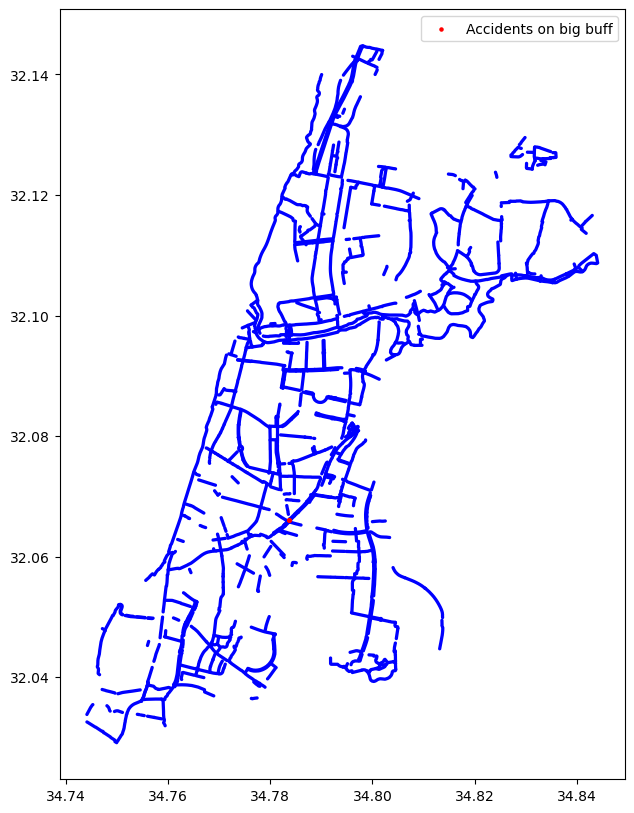

In [118]:
## Plotting Accidents for outside of buff

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# BP
bicycle_paths_big_overlap.plot(ax=ax, color='blue', label='Specific Bicycle Path')

# Plot accidents
accidents_on_big_buffered_paths.loc[[63,285]].plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )

# Plot the filtered accidents

plt.legend()
plt.show()

### After checking I found that the buffer might have cought an accident that doesn't belong.
I need to check the original

In [123]:
accidents_on_big_buffered_paths.columns

Index(['accident_id', 'provider_and_id', 'provider_code', 'file_type_police',
       'involved_type', 'involved_type_hebrew', 'license_acquiring_date',
       'age_group', 'age_group_hebrew', 'sex',
       ...
       'oid_shvil', 'msorech', 'dateimport', 'width', 'direction',
       'create_year', 'street_name', 'miflas', 'create_date', 'poly_geo'],
      dtype='object', length=174)

In [130]:
accidents_on_big_buffered_paths[accidents_on_big_buffered_paths.accident_id == 2013009458][['street1_hebrew','street_name', 'distance']]

street1_hebrew                      street_name  distance
63       דרך בגין  צומת יצחק שדה לינקולן גשר מעריב   0.00011
63       דרך בגין  צומת יצחק שדה לינקולן גשר מעריב   0.00011
63       דרך בגין               מנחם בגין צד מערבי   0.00011

Here we see that 

דרך בגין	מנחם בגין צד מערבי

Does catch it.

Lets check distance

We can see distance isn't a good way to handle changes.
We will have to use maybe a combination distance and street name

In [ ]:
accid_nodup_big_buff_paths

In [91]:
accid_nodup_big_buff_paths.oid_shvil

1       347
63      347
285     347
812     347
2206    347
       ... 
7233    264
7283    235
7353     47
7484    145
7713    233
Name: oid_shvil, Length: 3730, dtype: int16

### Removing duplication from small buff

In [92]:
accidents_on_small_buffered_paths[accidents_on_small_buffered_paths.duplicated(subset=['accident_id','involve_id'])].accident_id.value_counts()

2017014317    1
2021057456    1
2021093473    1
2017085291    1
2018042241    1
2018078587    1
2022082913    1
2020006542    1
2020089356    1
2022023235    1
Name: accident_id, dtype: int64

In [93]:
accid_nodup_small_buff_paths = accidents_on_small_buffered_paths.drop_duplicates(subset=['accident_id','involve_id']).copy()
accid_nodup_small_buff_paths

accident_id  provider_and_id  provider_code  file_type_police  \
3      2023076480      32023076480              3                 3   
1829   2016002335      32016002335              3                 3   
2102   2016031402      32016031402              3                 3   
2154   2016036285      32016036285              3                 3   
2237   2016061864      32016061864              3                 3   
...           ...              ...            ...               ...   
6829   2022006522      32022006522              3                 3   
7339   2022066423      32022066423              3                 3   
7371   2022069998      32022069998              3                 3   
7462   2022078505      12022078505              1                 1   
7698   2023021560      32023021560              3                 3   

      involved_type involved_type_hebrew  license_acquiring_date  age_group  \
3                 2             נהג נפגע                       0          8   
1829              2             נהג נפגע                       0         14   
2102              2             נהג נפגע                       0          6   
2154              2             נהג נפגע                       0         99   
2237              2             נהג נפגע                       0          6   
...             ...                  ...                     ...        ...   
6829              2             נהג נפגע                    2022          7   
7339              2             נהג נפגע                    1982         14   
7371              2             נהג נפגע                    2014          6   
7462              2             נהג נפגע                    2009          7   
7698              2             נהג נפגע                    2016          5   

     age_group_hebrew  sex  ... oid_shvil  msorech           dateimport  \
3               35-39  1.0  ...       280  1616.24  11/02/2024 00:31:49   
1829            65-69  1.0  ...       280  1616.24  11/02/2024 00:31:49   
2102            25-29  1.0  ...       280  1616.24  11/02/2024 00:31:49   
2154          לא ידוע  0.0  ...       280  1616.24  11/02/2024 00:31:49   
2237            25-29  1.0  ...       280  1616.24  11/02/2024 00:31:49   
...               ...  ...  ...       ...      ...                  ...   
6829            30-34  2.0  ...       185   250.84  11/02/2024 00:31:49   
7339            65-69  2.0  ...        28   881.43  11/02/2024 00:31:49   
7371            25-29  1.0  ...       330   168.98  11/02/2024 00:31:49   
7462            30-34  1.0  ...       266  2331.28  11/02/2024 00:31:49   
7698            20-24  1.0  ...       158   229.50  11/02/2024 00:31:49   

      width direction  create_year  \
3       2.5      None         2021   
1829    2.5      None         2021   
2102    2.5      None         2021   
2154    2.5      None         2021   
2237    2.5      None         2021   
...     ...       ...          ...   
6829    2.4   דו סטרי         2020   
7339    2.5   דו סטרי         2012   
7371    2.5      None         2022   
7462    1.5      None         2002   
7698    2.0   דו סטרי         2012   

                                       street_name  miflas create_date  \
3                          הרצל מדרך יפו עד בן צבי    כביש        None   
1829                       הרצל מדרך יפו עד בן צבי    כביש        None   
2102                       הרצל מדרך יפו עד בן צבי    כביש        None   
2154                       הרצל מדרך יפו עד בן צבי    כביש        None   
2237                       הרצל מדרך יפו עד בן צבי    כביש        None   
...                                            ...     ...         ...   
6829                                    גשר יהודית    None        None   
7339                  נורדאו מאבן גבירול עד הירקון    None        None   
7371  מנחם בגין מחשמונאים עד יוסף קארו מסלול מזרחי    כביש        None   
7462                                    אבן גבירול   מדרכה        None   
7698                            

### Removing accidents that exist in small buff and big buff

In [94]:
accid_nodup_big_buff_paths[accid_nodup_big_buff_paths.index.isin(accidents_on_small_buffered_paths.index)].shape

# All accidents in small buff exist in big buff, this is expected

(489, 174)

In [97]:
accid_big_buff_smallexcluded = accid_nodup_big_buff_paths.drop(index=accidents_on_small_buffered_paths.index).copy()
accid_big_buff_smallexcluded

accident_id  provider_and_id  provider_code  file_type_police  \
1      2023087892      32023087892              3                 3   
63     2013009458      12013009458              1                 1   
285    2013033127      32013033127              3                 3   
812    2014049004      32014049004              3                 3   
2206   2016045875      32016045875              3                 3   
...           ...              ...            ...               ...   
7233   2022051242      32022051242              3                 3   
7283   2022056027      32022056027              3                 3   
7353   2022063230      12022063230              1                 1   
7484   2022079314      12022079314              1                 1   
7713   2023039434      32023039434              3                 3   

      involved_type involved_type_hebrew  license_acquiring_date  age_group  \
1                 1                  נהג                       0         99   
63                2             נהג נפגע                       0         15   
285               2             נהג נפגע                       0         99   
812               2             נהג נפגע                       0          4   
2206              2             נהג נפגע                       0          8   
...             ...                  ...                     ...        ...   
7233              2             נהג נפגע                    2004          8   
7283              2             נהג נפגע                       0          4   
7353              2             נהג נפגע                       0         99   
7484              1                  נהג                       0          6   
7713              2             נהג נפגע                    2004          8   

     age_group_hebrew  sex  ... oid_shvil  msorech           dateimport  \
1             לא ידוע  0.0  ...       347   167.18  11/02/2024 00:31:49   
63              70-74  1.0  ...       347   167.18  11/02/2024 00:31:49   
285           לא ידוע  0.0  ...       347   167.18  11/02/2024 00:31:49   
812             15-19  1.0  ...       347   167.18  11/02/2024 00:31:49   
2206            35-39  1.0  ...       347   167.18  11/02/2024 00:31:49   
...               ...  ...  ...       ...      ...                  ...   
7233            35-39  1.0  ...       264   801.38  11/02/2024 00:31:49   
7283            15-19  1.0  ...       235   681.72  11/02/2024 00:31:49   
7353          לא ידוע  0.0  ...        47  1367.63  11/02/2024 00:31:49   
7484            25-29  1.0  ...       145  1455.95  11/02/2024 00:31:49   
7713            35-39  2.0  ...       233   243.04  11/02/2024 00:31:49   

      width direction  create_year                          street_name  \
1       2.5   דו סטרי         2022      צומת יצחק שדה לינקולן גשר מעריב   
63      2.5   דו סטרי         2022      צומת יצחק שדה לינקולן גשר מעריב   
285     2.5   דו סטרי         2022      צומת יצחק שדה לינקולן גשר מעריב   
812     2.5   דו סטרי         2022      צומת יצחק שדה לינקולן גשר מעריב   
2206    2.5   דו סטרי         2022      צומת יצחק שדה לינקולן גשר מעריב   
...     ...       ...          ...                                  ...   
7233    2.5      None         2021                 אופני דן פארק הירקון   
7283    2.5      None         2011                               בירנית   
7353    2.0   דו סטרי         2004                    הטייסים גד דרומית   
7484    2.0      None         2019  משמר הירדן מדבורה הנביאה עד וולנברג   
7713    2.5   דו סטרי         2020    יד המעביר מקהילת יאסי עד מבצע קדש   

      miflas create_date                                           poly_geo  
1       כביש        None  POLYGON ((34.78358 32.06607, 34.78367 32.06615...  
63      כביש        None  POLYGON ((34.78358 32.06607, 34.78367 32.06615...  
285     כביש        None  POLYGON ((34.78358 32.06607, 34.78367 32.06615...  
812     כביש        None  POLYGON ((34.78358 32.06607, 34.78367 32.06615...  
2206    כביש

In [ ]:
3241 - 3730 

-489

### Creating DF of all the accidents not in big buff or small buff

In [98]:
accidents_gdf_outside_buff_range = accidents_gdf.drop(index=accid_big_buff_smallexcluded.index).copy()
accidents_gdf_outside_buff_range = accidents_gdf_outside_buff_range.drop(index=accid_nodup_small_buff_paths.index)

accidents_gdf_outside_buff_range.shape

KeyError: '[1, 63, 285, 812, 2206, 6709, 879, 1201, 1300, 1775, 1903, 1977, 2168, 2179, 2828, 3132, 3989, 5890, 6091, 6188, 7244, 11, 206, 358, 713, 732, 763, 786, 889, 1120, 1125, 1242, 1254, 1255, 1267, 1374, 1735, 1771, 1922, 2109, 2117, 2379, 2817, 3335, 3469, 4160, 4204, 4267, 4476, 4948, 5152, 5514, 5875, 5999, 6509, 6978, 7206, 7315, 7362, 1401, 4444, 4, 464, 714, 968, 1122, 1148, 1198, 1558, 1615, 1796, 1841, 1847, 1864, 1875, 2039, 2142, 2699, 2780, 2900, 2956, 2957, 3171, 3187, 3199, 3214, 3415, 3421, 3548, 4793, 5043, 5276, 5336, 5385, 5475, 5481, 5494, 5518, 5950, 6097, 6579, 6660, 6671, 6701, 6844, 7173, 7256, 7366, 7595, 7649, 6, 57, 81, 361, 392, 532, 659, 711, 797, 808, 1203, 1427, 1818, 2358, 2448, 2449, 2687, 3593, 3789, 3790, 3935, 4146, 4678, 4765, 4821, 4960, 5577, 5895, 6862, 7112, 7151, 7, 8, 77, 258, 312, 315, 393, 419, 465, 522, 552, 581, 638, 658, 704, 718, 861, 1058, 1059, 1138, 1295, 1339, 1465, 1598, 1643, 1655, 1668, 1734, 1738, 1839, 2010, 2030, 2095, 2187, 2216, 2249, 2374, 2376, 2387, 2397, 2444, 2487, 2678, 2718, 2783, 3047, 3080, 3180, 3196, 3207, 3208, 3315, 3330, 3432, 3484, 3567, 3568, 3678, 3679, 3908, 4085, 4201, 4223, 4338, 4392, 4502, 4573, 4580, 4581, 4661, 4738, 5039, 5090, 5120, 5186, 5256, 5287, 5393, 5394, 5398, 5429, 5519, 5826, 5873, 5903, 5923, 6134, 6147, 6306, 6317, 6343, 6511, 6655, 6674, 6754, 7423, 7560, 7617, 7743, 7757, 7783, 12, 61, 102, 484, 556, 585, 671, 686, 913, 995, 1230, 1432, 1547, 2898, 3021, 3069, 3109, 3553, 3655, 3737, 3759, 3982, 3994, 4350, 4393, 4440, 4673, 4798, 5097, 5250, 5338, 5517, 5538, 5905, 6067, 6172, 6351, 6728, 6971, 7375, 7419, 7427, 7601, 7724, 13, 179, 1174, 1808, 1968, 2803, 4006, 4358, 4563, 4752, 5010, 5588, 7225, 14, 80, 2373, 3322, 3343, 3388, 3475, 4070, 6166, 747, 2977, 6640, 7646, 2970, 5509, 17, 273, 703, 2139, 2525, 2877, 3194, 3225, 6555, 6575, 7254, 18, 740, 1370, 1609, 2442, 2480, 2543, 4812, 6889, 6993, 7324, 7401, 20, 2291, 2635, 3219, 4232, 4312, 4774, 5916, 6825, 6908, 7317, 7537, 21, 217, 221, 251, 386, 400, 408, 444, 480, 488, 663, 673, 705, 737, 738, 741, 744, 753, 760, 791, 830, 866, 871, 887, 1099, 1104, 1195, 1196, 1219, 1280, 1368, 1376, 1394, 1425, 1426, 1428, 1455, 1528, 1538, 1552, 1595, 1622, 1623, 1637, 1650, 1657, 1675, 1784, 1911, 1915, 1941, 1942, 1965, 2040, 2057, 2118, 2178, 2219, 2306, 2316, 2336, 2340, 2403, 2404, 2410, 2414, 2419, 2463, 2489, 2561, 2609, 2719, 2784, 2815, 2867, 2868, 2875, 2945, 3032, 3038, 3079, 3145, 3176, 3254, 3256, 3305, 3307, 3309, 3413, 3453, 3459, 3480, 3570, 3616, 3640, 3667, 3757, 3896, 3907, 3943, 3955, 4056, 4096, 4100, 4101, 4129, 4137, 4329, 4399, 4494, 4495, 4572, 4585, 4605, 4641, 4652, 4669, 4749, 4767, 4773, 4784, 4880, 4954, 4961, 5187, 5330, 5335, 5435, 5438, 5583, 5739, 5921, 5949, 6044, 6194, 6250, 6642, 6711, 6836, 6964, 7108, 7222, 7320, 7381, 7383, 7696, 7738, 7748, 7759, 22, 192, 362, 793, 1851, 1852, 2060, 2712, 3076, 3078, 3629, 3693, 4489, 4710, 5418, 5560, 5666, 5942, 6108, 6282, 6403, 6790, 23, 48, 95, 116, 151, 185, 187, 188, 202, 215, 325, 375, 377, 402, 418, 440, 500, 572, 579, 583, 605, 767, 768, 819, 825, 828, 839, 892, 919, 949, 969, 1082, 1084, 1119, 1159, 1205, 1223, 1271, 1274, 1324, 1325, 1329, 1385, 1408, 1415, 1420, 1424, 1450, 1496, 1502, 1556, 1573, 1620, 1678, 1682, 1716, 1750, 1944, 1967, 1997, 2106, 2390, 2490, 2749, 2752, 2791, 3123, 3347, 3438, 3526, 3708, 3719, 3741, 4110, 4185, 4259, 4516, 4818, 4971, 5117, 5140, 5432, 5502, 5536, 5600, 5614, 5636, 6149, 6324, 6325, 6944, 6946, 7289, 7385, 7603, 1225, 1906, 4754, 4813, 6255, 7669, 246, 715, 2892, 6130, 24, 595, 727, 921, 1320, 1355, 1647, 1649, 3788, 5260, 5526, 5851, 5884, 6323, 6730, 7046, 25, 33, 97, 420, 521, 524, 626, 788, 1772, 1803, 2114, 2326, 2599, 2664, 3088, 3323, 3500, 3507, 3535, 3866, 4019, 4263, 4400, 4649, 5074, 5404, 5405, 5444, 5478, 5533, 5831, 5870, 5901, 6269, 6486, 6524, 6683, 7306, 7312, 7428, 7441, 7681, 26, 1216, 2001, 2250, 2315, 2854, 3346, 4493, 5021, 5415, 5673, 6678, 29, 119, 134, 252, 1251, 2028, 2151, 2288, 2324, 2520, 3258, 3287, 3591, 3635, 4198, 4456, 4970, 5365, 5384, 5812, 7243, 7548, 7587, 428, 1722, 1929, 1931, 1972, 2742, 2881, 3255, 3369, 3478, 3620, 6241, 35, 36, 335, 2082, 2631, 3116, 3261, 4083, 4256, 6600, 7349, 37, 162, 181, 494, 601, 668, 717, 724, 854, 974, 1023, 1131, 1163, 1213, 1235, 1476, 1574, 1590, 1602, 1699, 1704, 1917, 1933, 2169, 2443, 2697, 2836, 2920, 2962, 3378, 3449, 3581, 3642, 3645, 3966, 4005, 4325, 4680, 4719, 4962, 5430, 5503, 5572, 6357, 6460, 6476, 6842, 7137, 7337, 7791, 45, 1491, 4750, 4857, 7146, 7726, 7767, 51, 456, 458, 938, 1032, 1062, 1383, 1409, 1713, 1756, 2058, 2120, 2567, 2763, 3983, 4183, 4352, 4397, 4587, 4692, 5065, 5114, 5566, 5706, 5973, 6358, 6548, 6591, 6622, 6629, 6817, 6876, 6941, 7035, 7052, 7216, 7217, 7478, 2173, 2297, 5038, 6522, 7334, 60, 1033, 2174, 3282, 5207, 5598, 6444, 7020, 7351, 62, 944, 1265, 1570, 1999, 2092, 3203, 3580, 3672, 3897, 3919, 4360, 4586, 4718, 6534, 6877, 7688, 6815, 7142, 310, 7145, 985, 1067, 1068, 2855, 3552, 4061, 4065, 4134, 5201, 5624, 5632, 6180, 7347, 64, 2284, 4161, 4852, 5964, 67, 222, 413, 603, 927, 1410, 1892, 2023, 2302, 2371, 4067, 4102, 4176, 4809, 5677, 6679, 6851, 6855, 6953, 7785, 506, 961, 2461, 2559, 3681, 7291, 70, 244, 250, 288, 493, 558, 559, 666, 710, 1546, 1862, 2158, 2253, 2592, 2674, 3312, 3648, 3951, 3985, 4291, 4426, 4510, 4758, 4865, 4873, 5178, 5351, 5584, 5861, 5864, 6013, 6739, 7215, 7290, 7432, 7599, 7625, 7700, 3649, 7149, 76, 4685, 5257, 7556, 365, 992, 1134, 1263, 1279, 1328, 1630, 2519, 2917, 3122, 3124, 3297, 4670, 4674, 4684, 4786, 4978, 5273, 5277, 6632, 7284, 7569, 85, 655, 838, 1457, 1557, 1664, 1702, 1747, 2090, 2243, 2633, 3479, 3560, 3799, 3832, 4135, 4515, 4930, 4997, 6265, 7211, 2164, 3073, 3385, 4258, 4506, 4601, 4822, 4915, 4981, 5948, 6459, 7570, 86, 180, 508, 1136, 1227, 1389, 1718, 1884, 2047, 3316, 3675, 3685, 3850, 4353, 5470, 6798, 7350, 7487, 7597, 7598, 614, 3547, 3696, 4734, 4760, 5652, 6328, 6782, 7249, 1014, 1016, 1541, 88, 242, 298, 561, 627, 680, 684, 900, 940, 2266, 2289, 2491, 2500, 2555, 2709, 2774, 3289, 3847, 4268, 5571, 7477, 7482, 677, 1594, 1596, 1913, 2214, 5630, 5943, 7492, 299, 2484, 3004, 4876, 5053, 6178, 6179, 91, 158, 2804, 3143, 6959, 7464, 7526, 6209, 92, 574, 591, 880, 920, 2751, 3215, 3718, 4389, 5169, 96, 282, 410, 702, 769, 821, 1115, 1661, 1769, 1826, 2031, 2125, 2165, 2590, 2636, 2637, 2643, 2654, 2937, 2994, 3001, 3474, 3508, 3509, 4238, 4590, 4617, 5545, 5617, 5762, 6474, 6475, 6553, 6570, 6734, 7043, 7297, 7533, 7589, 7740, 101, 4370, 4536, 4672, 270, 1194, 1593, 2657, 4346, 5353, 5454, 5818, 6901, 7403, 254, 1290, 1576, 1820, 2262, 2334, 2809, 3767, 3845, 3849, 3870, 3915, 4219, 5472, 5683, 7503, 7510, 107, 111, 283, 1429, 1524, 1549, 2899, 3120, 3457, 3940, 4136, 4349, 5089, 5157, 6049, 6059, 6073, 6596, 6736, 7030, 7084, 7286, 7345, 7764, 2928, 4222, 7566, 127, 1817, 5387, 5580, 7527, 130, 3911, 4561, 7762, 136, 265, 274, 542, 923, 1422, 1838, 1881, 1883, 2073, 3851, 4381, 4522, 4535, 4795, 5459, 6752, 7239, 7325, 7779, 7780, 1334, 1981, 4654, 2926, 5881, 7121, 7684, 7769, 138, 264, 327, 399, 409, 607, 613, 645, 778, 809, 811, 855, 860, 888, 1019, 1097, 1109, 1127, 1181, 1236, 1237, 1238, 1319, 1568, 1569, 1688, 1737, 1804, 1844, 1874, 2045, 2076, 2143, 2155, 2190, 2422, 2446, 2510, 2614, 2668, 2764, 3066, 3067, 3383, 3537, 3705, 3792, 3859, 3864, 4094, 4159, 4228, 4277, 4319, 4414, 4433, 4436, 4509, 4558, 4676, 4771, 4775, 4778, 4783, 4826, 4838, 4842, 4940, 5003, 5092, 5110, 5231, 5235, 5252, 5268, 5271, 5319, 5331, 5406, 5541, 5548, 5574, 5665, 5687, 5765, 5792, 5795, 5805, 5809, 5849, 5850, 5866, 5931, 5987, 5993, 6183, 6504, 6670, 6882, 6887, 6900, 6975, 7086, 7264, 7304, 7305, 7327, 7328, 7402, 7547, 7592, 7692, 139, 140, 570, 2241, 2242, 2544, 3094, 3867, 4705, 4788, 4790, 4791, 5563, 5876, 6114, 6136, 6137, 6162, 6218, 7066, 141, 224, 356, 394, 473, 490, 657, 678, 764, 781, 956, 1073, 1113, 1283, 1284, 1311, 1400, 1707, 1755, 1773, 1837, 1982, 2161, 2272, 2283, 2848, 2849, 2930, 2931, 2982, 3063, 3248, 3263, 3326, 3452, 3543, 3556, 3569, 3702, 3763, 3805, 3929, 3984, 4073, 4233, 4298, 4616, 4745, 5118, 5148, 5713, 5729, 5803, 5806, 5848, 5925, 6207, 6304, 6456, 6609, 6669, 6724, 6755, 6801, 6869, 6903, 6906, 7415, 7747, 142, 311, 706, 728, 729, 824, 1065, 1139, 1431, 1998, 2113, 3014, 3320, 3392, 3579, 3749, 3774, 4108, 4121, 4362, 4438, 4481, 4736, 5272, 6445, 6951, 403, 906, 5109, 5569, 5662, 6236, 2901, 150, 169, 1893, 1951, 2811, 3458, 4044, 4559, 154, 884, 2312, 2481, 2715, 5653, 5953, 6589, 1048, 1390, 1621, 3690, 3944, 4394, 4698, 4835, 5047, 5228, 5891, 6535, 7357, 7672, 157, 177, 1210, 2781, 3068, 3684, 4621, 4626, 5134, 5136, 5686, 5819, 5900, 6494, 6776, 6788, 7734, 7760, 183, 867, 1526, 4345, 6051, 6374, 6389, 6446, 7594, 7489, 186, 4756, 193, 569, 745, 1080, 1081, 1386, 1799, 1821, 1894, 1905, 2406, 2641, 4514, 5382, 6042, 6168, 6525, 7235, 7542, 194, 1342, 2503, 2972, 3880, 6257, 7609, 1919, 4913, 6943, 209, 483, 925, 1161, 1193, 2372, 2862, 3359, 3848, 4449, 4832, 5045, 5160, 5544, 5642, 5859, 6011, 6272, 6807, 6808, 6809, 211, 3065, 4220, 4854, 4713, 582, 5049, 7271, 236, 1017, 1479, 2215, 2896, 3565, 4644, 5168, 5198, 5206, 6429, 6495, 6545, 6746, 7154, 7559, 239, 241, 482, 967, 3329, 4091, 4282, 4316, 4348, 5183, 5757, 7613, 7638, 7652, 367, 1812, 1938, 3138, 6008, 6197, 6471, 7354, 7358, 7413, 7567, 7744, 245, 1876, 2036, 2051, 2640, 3336, 5505, 6665, 7005, 7034, 4608, 249, 341, 425, 691, 1063, 1183, 1239, 1406, 1587, 2059, 2570, 2620, 2769, 2790, 2805, 2831, 2871, 2911, 2978, 3030, 3058, 3150, 3158, 3405, 3619, 3659, 3730, 3736, 3806, 3952, 4064, 4115, 4242, 4284, 4303, 4364, 4375, 4390, 4469, 4546, 4591, 4653, 4660, 4706, 4714, 4761, 4799, 4814, 4891, 4937, 5027, 5068, 5088, 5111, 5137, 5158, 5237, 5241, 5254, 5297, 5323, 5364, 5453, 5607, 5612, 5760, 5761, 5871, 6005, 6006, 6029, 6053, 6174, 6290, 6292, 6412, 6550, 6619, 6663, 6667, 6717, 6745, 6779, 6874, 6927, 6972, 7002, 7093, 7097, 7102, 7123, 7220, 7232, 7336, 7338, 7412, 7486, 7506, 7552, 7573, 7585, 7615, 7642, 7701, 7786, 253, 297, 373, 674, 765, 1009, 1047, 1093, 1142, 1160, 1315, 1472, 1481, 1492, 1529, 1542, 1560, 1757, 2016, 2046, 2048, 2180, 2189, 2394, 2424, 2493, 2613, 2653, 2807, 2808, 2834, 2859, 3387, 3393, 3423, 3564, 3577, 3725, 4028, 4055, 4113, 4334, 4403, 4483, 4492, 4512, 4550, 4552, 4592, 4613, 4648, 4737, 4928, 4963, 4968, 5209, 5285, 5350, 5555, 5564, 5990, 6295, 6344, 6537, 6601, 6696, 6830, 6834, 6853, 6935, 6955, 7298, 7322, 7466, 7614, 7781, 7763, 357, 401, 438, 1132, 1378, 1776, 1877, 3550, 3923, 4211, 4872, 4875, 5320, 5698, 5899, 6758, 6961, 6998, 7650, 7675, 7676, 257, 454, 1381, 2348, 2349, 3839, 4615, 5746, 7400, 7722, 2968, 3427, 4017, 4681, 5956, 1094, 1382, 1448, 1730, 2685, 2686, 3624, 5485, 5486, 6597, 6942, 7380, 7551, 7622, 281, 1276, 2112, 2741, 4766, 5678, 5940, 6140, 1846, 2535, 286, 460, 563, 642, 804, 916, 931, 1101, 1111, 1411, 1490, 1493, 1494, 1604, 1781, 1819, 1948, 2195, 2204, 2228, 2236, 2451, 2464, 2564, 2589, 2679, 2691, 3139, 3174, 3186, 3237, 3285, 3355, 3396, 3410, 3490, 3779, 3787, 3981, 4107, 4132, 4162, 4163, 4213, 4214, 4274, 4286, 4354, 4359, 4415, 4611, 4690, 4770, 5042, 5123, 5124, 5176, 5233, 5552, 5932, 6307, 6382, 6397, 6547, 6812, 6821, 6826, 6893, 6934, 6954, 6992, 7177, 7187, 7203, 7208, 7310, 7398, 7735, 290, 633, 1380, 1535, 1816, 1946, 3638, 4011, 5232, 5374, 5579, 5629, 5976, 6075, 6845, 6857, 7125, 7683, 291, 344, 345, 1371, 2624, 3010, 3147, 3164, 3223, 3224, 4904, 6602, 6824, 6987, 293, 5127, 302, 1674, 2094, 2473, 2876, 4170, 4271, 4424, 4504, 5259, 6177, 6781, 7708, 3953, 4205, 4244, 1083, 3700, 4911, 5413, 1634, 3205, 329, 469, 853, 1262, 2906, 2907, 3050, 4318, 5044, 6384, 6399, 6618, 7561, 7670, 7792, 339, 342, 1790, 2025, 4955, 5050, 7365, 350, 648, 1861, 4093, 7394, 351, 1403, 1788, 5692, 6121, 6506, 6793, 1042, 4624, 2729, 4866, 4886, 7691, 369, 1731, 2437, 2647, 3502, 4702, 4716, 5894, 6031, 1899, 5906, 6765, 370, 909, 1780, 2382, 2540, 2844, 3460, 3461, 6463, 6608, 374, 389, 472, 516, 840, 960, 976, 1070, 1087, 1520, 1591, 1666, 1855, 2122, 2188, 2385, 2486, 2554, 3012, 3061, 3487, 3604, 3626, 3856, 4041, 4218, 4302, 4603, 4679, 4785, 4845, 5208, 5220, 5646, 5680, 5718, 5914, 5988, 6150, 6151, 6222, 6230, 6248, 6342, 6769, 6787, 7765, 380, 528, 596, 762, 1312, 1469, 1746, 1895, 2150, 2265, 2328, 3098, 3854, 5633, 5685, 5807, 6447, 383, 543, 557, 805, 1010, 1103, 1597, 1831, 2019, 2041, 2056, 2227, 2408, 2411, 3357, 3682, 3822, 4340, 4374, 4534, 4543, 4631, 4953, 5028, 5078, 5184, 5191, 5626, 5904, 6327, 6347, 6573, 6707, 6940, 7194, 7229, 384, 650, 843, 1018, 1037, 1060, 1350, 1497, 1607, 1971, 2089, 2251, 2300, 2586, 2670, 2880, 2882, 3013, 3093, 3571, 4098, 4485, 5618, 5754, 6022, 6583, 7003, 7262, 385, 439, 511, 1298, 1633, 3523, 397, 487, 492, 503, 553, 820, 1351, 1639, 2303, 2941, 3960, 4254, 5244, 5550, 6141, 6320, 7221, 7771, 412, 519, 936, 1006, 1151, 1676, 1879, 2682, 2910, 2925, 3071, 3300, 3411, 4408, 4598, 5707, 5920, 5957, 6074, 6200, 6472, 7386, 7505, 7752, 610, 1075, 3909, 431, 933, 1866, 1885, 2534, 3455, 4936, 5261, 5433, 5725, 6480, 7302, 437, 6426, 1849, 1854, 2477, 2496, 2969, 5161, 5460, 5493, 6064, 6354, 466, 475, 771, 2177, 2332, 2537, 4347, 4548, 4595, 4831, 5060, 5278, 5423, 5425, 5551, 471, 649, 1605, 2426, 2802, 3338, 3464, 3697, 4530, 4582, 4846, 4847, 6268, 6930, 7516, 7536, 7685, 7761, 7774, 6956, 481, 485, 3865, 5625, 3057, 3059, 4294, 4914, 498, 1092, 1671, 2263, 2433, 4241, 4384, 5197, 5303, 5419, 5735, 5979, 6003, 6586, 6789, 7360, 7568, 7749, 1404, 3588, 3852, 4473, 5991, 6852, 5671, 545, 679, 3189, 3601, 4266, 4517, 4523, 4902, 5083, 5122, 5352, 5391, 5982, 547, 1464, 1789, 2775, 3437, 5946, 6458, 7079, 549, 1292, 1354, 1361, 554, 2860, 2878, 3796, 3970, 5282, 5294, 7166, 7647, 2391, 3646, 3647, 4089, 4768, 5264, 5265, 5322, 6196, 7048, 7326, 7387, 7775, 575, 576, 2593, 2879, 3882, 6289, 6599, 7335, 2084, 2700, 2701, 4013, 5008, 5046, 5210, 6308, 934, 979, 6490, 6503, 592, 4240, 4331, 5333, 6083, 6393, 1725, 1992, 2321, 3118, 3128, 3210, 3820, 4333, 5383, 5440, 5842, 5966, 6329, 6443, 7295, 7535, 7604, 599, 954, 975, 2605, 2895, 3668, 4111, 4249, 4628, 4647, 5052, 5093, 5139, 5325, 5452, 5705, 5787, 5808, 6111, 6349, 6362, 6621, 6653, 6710, 6803, 6875, 7063, 7410, 7470, 7504, 7574, 608, 1000, 2074, 611, 751, 754, 755, 1444, 1446, 1962, 2148, 2275, 2400, 3062, 3760, 4388, 4421, 5304, 5930, 5938, 5939, 6128, 6243, 7788, 620, 4221, 7714, 7728, 1152, 1154, 2587, 3209, 4823, 5474, 6225, 6519, 632, 3040, 4874, 2845, 4721, 5994, 6266, 639, 2499, 640, 3319, 3409, 4465, 5163, 5622, 6148, 6285, 681, 696, 1259, 2268, 2343, 3586, 3644, 4490, 5733, 6253, 6528, 6860, 7463, 7488, 697, 723, 1751, 2498, 2773, 2950, 3448, 4337, 4789, 4989, 5516, 5524, 6249, 6273, 6703, 6704, 7009, 7021, 7050, 7051, 7189, 7210, 709, 712, 986, 987, 1629, 2007, 2342, 2392, 2562, 2565, 2566, 3053, 3280, 3934, 4781, 5570, 5865, 6056, 6214, 6299, 6731, 7196, 7600, 774, 1053, 1091, 2111, 6045, 6365, 7202, 7784, 823, 1499, 1537, 1963, 2417, 2530, 3095, 816, 857, 1679, 1923, 3512, 4114, 4899, 5417, 5971, 6276, 6974, 7252, 7442, 7448, 7702, 2080, 4197, 6205, 7267, 844, 3811, 873, 3650, 4363, 4452, 6909, 881, 907, 2455, 2538, 4156, 4801, 908, 1858, 1976, 2305, 2779, 2813, 3273, 3666, 3802, 4051, 4086, 5069, 5589, 6514, 7539, 7540, 1348, 1700, 7281, 1460, 2717, 7436, 1015, 1026, 1143, 1316, 2101, 2147, 3133, 3614, 4165, 4949, 5173, 5640, 5655, 5843, 6340, 6413, 7095, 7712, 964, 1828, 1996, 4924, 7082, 2986, 4231, 2345, 3933, 6023, 1012, 2841, 1030, 1031, 1575, 1651, 2198, 2711, 3172, 6086, 7695, 1036, 2355, 4700, 5937, 6843, 1252, 5368, 1064, 5188, 5954, 3146, 3928, 5167, 1069, 1514, 1684, 2085, 2274, 2591, 2708, 2864, 3039, 3197, 3380, 3800, 3801, 4551, 4568, 4759, 5284, 5488, 5700, 6905, 7219, 7231, 7382, 7715, 2558, 5529, 5702, 4054, 1135, 4488, 1995, 2026, 2029, 2908, 2936, 2979, 3975, 3979, 4326, 4920, 7073, 1137, 2246, 4811, 6962, 1153, 1646, 6420, 7588, 7621, 7633, 1167, 1890, 3114, 3117, 1179, 3075, 4182, 5375, 7361, 4491, 7586, 1586, 2759, 1211, 7072, 1289, 1294, 1302, 1397, 3167, 6467, 1313, 1474, 1896, 1898, 2072, 2267, 2518, 2644, 2863, 2939, 3100, 3471, 3603, 3621, 3885, 3892, 3957, 3965, 4513, 4898, 5230, 5576, 5777, 6220, 6224, 1321, 3871, 3962, 4633, 2838, 3954, 6035, 6552, 1327, 2132, 2314, 3504, 4058, 6966, 1341, 4614, 4900, 7182, 1421, 1617, 6501, 1478, 2213, 3902, 4695, 5309, 5701, 6157, 3716, 4429, 4956, 4979, 7376, 7532, 4584, 5779, 1512, 1519, 1516, 1518, 2961, 5377, 7134, 4632, 4040, 6030, 1959, 1960, 1562, 3950, 1572, 1843, 3814, 3815, 1588, 7083, 1610, 2588, 3831, 5523, 6510, 6948, 1692, 1698, 1859, 2223, 2281, 4566, 4901, 5192, 6348, 7085, 7143, 1710, 6585, 1729, 1743, 1774, 6119, 2258, 2521, 3712, 5427, 7094, 1822, 2796, 3917, 2157, 3536, 3750, 4024, 5310, 5684, 6989, 7153, 2298, 1871, 1872, 3026, 3628, 6245, 7447, 1882, 2052, 2870, 5147, 5180, 6497, 6774, 6810, 6891, 7041, 7199, 7294, 1891, 3559, 1912, 3220, 5066, 1934, 2771, 3134, 4983, 5213, 6359, 1937, 4596, 5813, 1980, 2027, 2436, 2893, 3823, 4802, 6204, 6751, 7055, 2069, 2279, 2378, 3476, 3602, 4196, 4460, 4528, 4677, 4689, 5349, 5595, 5676, 6576, 6698, 6699, 7180, 7250, 7251, 7431, 7679, 2097, 3298, 3425, 7451, 2191, 2663, 2929, 3529, 3592, 4150, 4521, 7414, 7578, 2207, 2993, 3754, 3755, 4665, 5379, 5734, 5836, 5933, 5981, 6181, 6977, 7331, 2210, 2252, 4825, 5983, 7461, 7768, 2217, 6658, 2255, 2331, 4000, 2347, 2367, 4237, 4518, 5025, 4668, 2482, 6159, 6976, 4450, 5390, 2607, 2622, 5032, 2688, 2693, 4320, 4499, 5539, 7392, 2725, 4255, 5203, 2913, 3011, 3661, 3662, 4475, 4800, 4998, 5170, 5182, 6997, 7147, 3740, 3993, 4187, 5098, 5317, 7364, 7019, 3096, 3107, 3135, 4610, 5063, 6523, 6644, 4722, 5613, 7706, 7721, 3165, 4149, 4379, 4422, 7725, 3233, 3551, 3375, 5023, 3433, 3520, 3766, 6082, 6084, 7022, 7109, 7384, 7711, 4087, 4792, 5749, 7388, 7393, 7753, 4032, 7727, 4140, 5878, 4164, 5669, 5103, 6451, 5100, 4890, 4917, 4946, 5061, 5062, 5070, 6675, 5151, 5344, 5396, 7457, 5530, 5911, 6085, 6018, 6191, 6433, 6239, 6558, 6563, 6559, 7110, 7190, 7198, 6598, 6879, 7223, 7233, 7283, 7353, 7484, 7713] not found in axis'

### Show accidents on map with BP

NameError: name 'bicycle_paths_big_overlap' is not defined

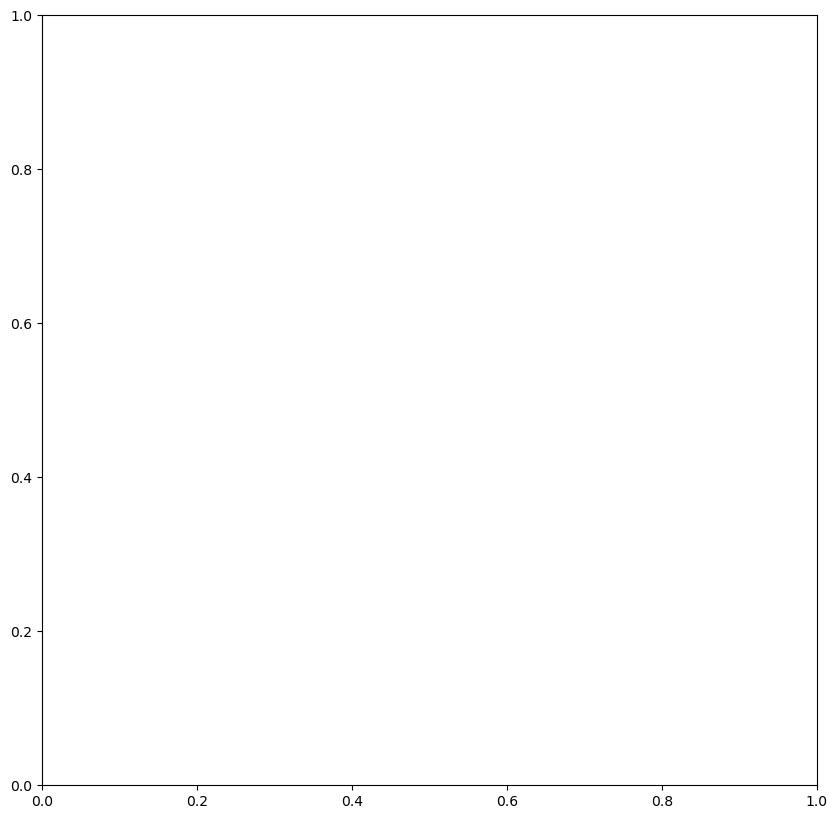

In [1]:
## Plotting Accidents for big buff

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# Plot all bike paths for context
bicycle_paths_big_overlap.plot(ax=ax, color='blue', label='Specific Bicycle Path')

# Plot accidents
accid_nodup_big_buff_paths.plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )

# Plot the filtered accidents

plt.legend()
plt.show()

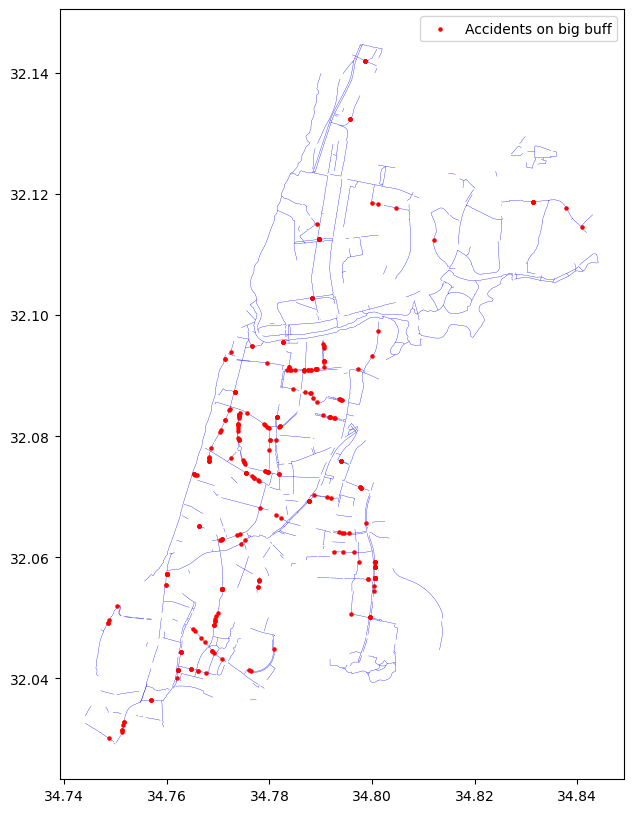

In [ ]:
## Plotting Accidents for small buff

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# Plot all bike paths for context
bicycle_paths_small_overlap.plot(ax=ax, color='blue', label='Specific Bicycle Path')

# Plot accidents
accid_nodup_small_buff_paths.plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )

# Plot the filtered accidents

plt.legend()
plt.show()

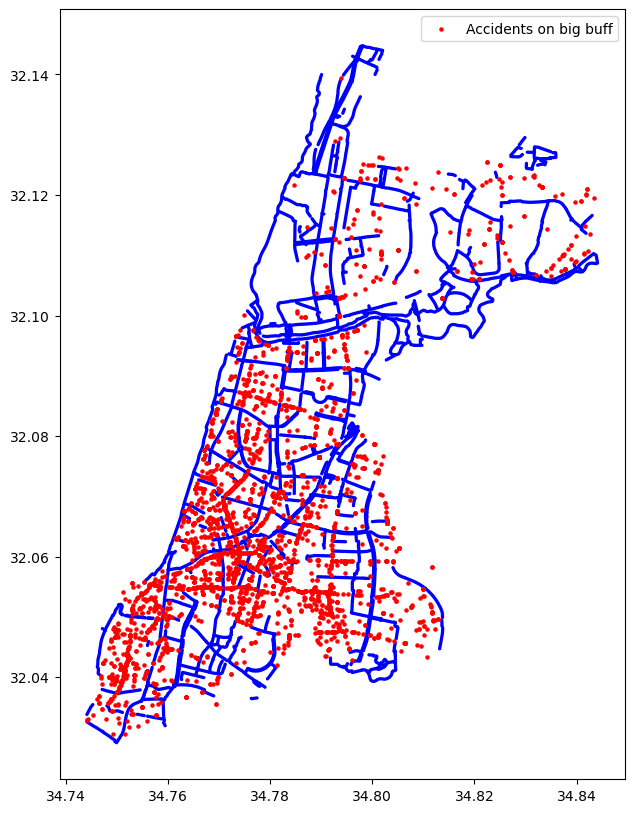

In [ ]:
## Plotting Accidents for outside of buff

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# Plot all bike paths for context
bicycle_paths_big_overlap.plot(ax=ax, color='blue', label='Specific Bicycle Path')

# Plot accidents
accidents_gdf_outside_buff_range.plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )

# Plot the filtered accidents

plt.legend()
plt.show()

### accidents_gdf_outside_buff_range Has no oid_shvil to relate
This needs to be resolved by connecting it to the street OR connect it specifically to the segment in oid_shvil using some distance metric.<br>
Probably a combination of the two.

In [ ]:
# accidents_gdf_outside_buff_range.oid_shvil

### Trying to count the number of accidents for each segment

In [ ]:
accid_nodup_small_buff_paths.poly_geo.value_counts()

POLYGON ((34.77396 32.07924, 34.77396 32.07924...    63
POLYGON ((34.80026 32.05395, 34.80026 32.05395...    46
POLYGON ((34.77085 32.05468, 34.77086 32.05464...    37
POLYGON ((34.75984 32.05701, 34.75984 32.05701...    30
POLYGON ((34.78978 32.09114, 34.78978 32.09114...    29
                                                     ..
POLYGON ((34.77248 32.07642, 34.77204 32.07603...     1
POLYGON ((34.77505 32.06288, 34.77504 32.06289...     1
POLYGON ((34.84093 32.11425, 34.84093 32.11425...     1
POLYGON ((34.78139 32.07938, 34.78139 32.07946...     1
POLYGON ((34.77998 32.08141, 34.78002 32.07964...     1
Name: poly_geo, Length: 94, dtype: int64

### NEXT STEP: Connect accidents out of buff range to street/segment

Calculating distance from line string.

In [ ]:
import geopandas as gpd
from shapely.geometry import Point, LineString
from shapely.ops import nearest_points

# bicycle_paths_small_overlap.drop(columns=['geometry'], inplace=True)
# Finding nearest points
nearest_points_list = []
for row_ in accidents_gdf.iterrows():
    # Initialize minimum distance and nearest point
    row_data_acci = row_[1]
    point = row_data_acci['geometry']

    min_distance = float('inf')
    nearest_point = None
    nearest_point_row_data = None
    for row in bicycle_paths_small_overlap.iterrows():
        row_data_bp = row[1]
        print(row_data_bp)
        poly = row_data_bp['poly_geo']
        point_on_poly = nearest_points(point, poly)[1]
        distance = point.distance(point_on_poly)
        if distance < min_distance:
            min_distance = distance
            nearest_point = point_on_poly
            nearest_point_row_data = [row_data_bp, row_data_bp]
    nearest_points_list.append(nearest_point_row_data)

# # Create a GeoSeries or GeoDataFrame with these nearest points
# nearest_points_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(nearest_points_list))

# print(nearest_points_gdf)


In [ ]:
import geopandas as gpd
from shapely.geometry import Point, LineString
from shapely.ops import nearest_points

# Initialize an empty list to store combined row data along with nearest point geometry
combined_data_list = []

for row_ in accidents_gdf.iterrows():
    row_data_acci = row_[1]
    point = row_data_acci['geometry']

    min_distance = float('inf')
    nearest_point = None
    combined_row_data = None
    for row in bicycle_paths_small_overlap.iterrows():
        row_data_bp = row[1]
        poly = row_data_bp['poly_geo']
        point_on_poly = nearest_points(point, poly)[1]
        distance = point.distance(point_on_poly)
        if distance < min_distance:
            min_distance = distance
            nearest_point = point_on_poly
            # Combine the data from accidents and bicycle paths into a single dictionary
            combined_row_data = {**row_data_acci.to_dict(), **row_data_bp.to_dict(), 'nearest_point': nearest_point, 'distance':min_distance}

    if combined_row_data:
        combined_data_list.append(combined_row_data)

# Convert the combined data list into a GeoDataFrame
nearest_points_gdf = gpd.GeoDataFrame(combined_data_list)

# Set the geometry to the nearest points
nearest_points_gdf.set_geometry('nearest_point', inplace=True)

print(nearest_points_gdf)


KeyboardInterrupt: 

In [ ]:
nearest_points_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(nearest_points_list))

print(nearest_points_gdf)

TypeError: Non geometry data passed to GeoSeries constructor, received data of dtype 'object'

Micro mobility BP Goals:
[] Get number of accidents of a street before BP and after a BP.

Problems discovered:
* Some accidents show on the same BP twice, because BP are divided to different segments when buffering some segments overlap.
    * [X] Solution remove duplication of accidents. 

Next stage, filter accidents based on year and only show the BP when it became operational. 


Show accidents before BP became usable.<br>
Show accidents after BP became usable.

Things to consider:
* Some BP have a lot of accidents some none, I want a list of accidents per BP.
    * This requires that accidents that are far way will be related using the street OR closeness to a segment.
* Add a 2 columns accidents count before the lane is usable and after the lane is usable.
    * This is different than showing on a map the accidents
    * This means I need a function to COUNT the accidents before and after a function to SHOW accidents in EACH year before and EACH year after. 

* How to consider when a lane is usable? 6 months? 1 year? Sometimes people use BP before they are usable.
    * I think I need to use 3 months where we have dates otherwise use 1 year

How will the operation of showing accidents before and after work.
* It will be a function
* Function receives BP oid.
* Function gets year of BP becoming operational
